# Test Battery for Private Alpha Synthesis

A Private Alpha belief is synthesized by the agent based on the Public Alpha signal $\tilde\alpha_s$ and the Private Alpha signal $\hat\alpha_s$. The resulting synthesized belief is a convex combination of the Public Alpha signal and Private Alpha signal weighted by a bias $b$ towards the Public Alpha signal.

$$\hat\alpha = (b)\tilde\alpha_{signal} + (1-b)\hat\alpha_{signal}$$

We run controlled experiments where Public Alpha signal and Private Alpha signals are controlled by being set to the following values:
- Public Alpha signal $\tilde\alpha_{signal}$ can take on the forms: 
* Does not exist N/A, Static $-$ 
* Steadily increasing $\uparrow$
* Steadily decreasing $\downarrow$ 
- Private Alpha signal $\hat\alpha_{signal}$ can take on the forms: 
* Static $-$
* Steadily increasing $\uparrow$
* Steadily decreasing $\downarrow$ 

Every combination of the signal forms is tested in the experiments; see table below.

#### Notations

- $-$ indicates a **controlled and static** signal
- $\uparrow$ indicates a **controlled and increasing** signal
- $\downarrow$ indicates a **controlled and decreasing** signal

| | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | 
| :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| Public Alpha signal $\tilde\alpha_{signal}$ | N/A | N/A | N/A | $-$ | $-$ | $-$ | $\uparrow$ | $\downarrow$ | $\uparrow$ | $\downarrow$ | $\uparrow$ | $\downarrow$ |
| Private Alpha signal $\hat\alpha_{signal}$ | $-$ | $\uparrow$ | $\downarrow$ | $-$ | $\uparrow$ | $\downarrow$ | $-$ | $-$ | $\uparrow$ | $\uparrow$ | $\downarrow$ | $\downarrow$ |


We start with the base cases where the agent formulates their private alpha belief based on the Private Alpha signal only, without considering any on-chain information in the form of Public Alpha signal.


## Model File structure
* private_alpha_synthesis.ipynb
* src/sim
* src/sim/model
* src/sim/model/parts

In the sim folder there exist 3 files and a model folder, the [config.py](src/sim/config.py), [run.py](src/sim/run.py), and [sim_setup.py](src/sim/sim_setup.py). The [config.py](src/sim/config.py) contains the simulation configurations, aggregating the partial states, and the state variables. [run.py](src/sim/run.py) actually runs the simulation, and [sim_setup.py](src/sim/sim_setup.py) defines the number of timesteps and monte carlo runs (these 12 simulations have 100 timesteps and no monte carlo runs). 

Within the src/sim/model folder, there are 3 files and a parts folder. The [partial_state_update_block.py](src/sim/model/partial_state_update_block.py) contains the partial state update blocks and how they update the state variables. [state_variables.py](src/sim/model/state_variables.py) defines the state variables and [state_variables.py](src/sim/model/state_variables.py). [sys_params.py](src/sim/model/sys_params.py) specifies hyperparameters for the simulation.


The mechanisms of the model live within the parts subfolder as:
* [attest.py](src/sim/model/parts/attest.py)
* [bondburn.py](src/sim/model/parts/bondburn.py)
* [choose_action.py](src/sim/model/parts/choose_action.py)
* [choose_agent.py](src/sim/model/parts/choose_agent.py)
* [monthly_instalment.py](src/sim/model/parts/monthly_instalment.py)
* [private_beliefs.py](src/sim/model/parts/private_beliefs.py)
* [put_agent_back_to_df.py](src/sim/model/parts/put_agent_back_to_df.py)
* [uniswap.py](src/sim/model/parts/uniswap.py)
* [utils.py](src/sim/model/parts/utils.py)

For the varying tests in this notebook, we will be modifying the *update_agent_beliefs* mechanism in the [private_beliefs.py](src/sim/model/parts/private_beliefs.py) file (function showed below)

We will run each test case, modify the *update_agent_beliefs* for the next test case, Restart the kernal ("Kernal" -> "Restart" on navigation bar), and then run the next two test case cells, the first for running the simulation, the second for plotting the simulation. and then run the next test case.

### Test 1 (base case): Public Alpha signal does not exist and Private Alpha signal is static

Public Alpha signal does not exist. $$\tilde\alpha_{signal} = N/A$$ <br>
Private Alpha signal is set to be controlled and static $$\hat\alpha_{signal} = 0.5$$ <br>
The bias $b$ is irrelevant as Public Alpha signal does not exist





Update the *update_agent_beliefs* mechanism in the [private_beliefs.py](src/sim/model/parts/private_beliefs.py) file to match what is shown below and update line 53 of [state_variables.py](src/sim/model/state_variables.py) to be 0

```
def update_agent_beliefs(params, substep, state_history, prev_state, policy_input):

    agent = prev_state['chosen_agent']
    timestep = prev_state['timestep']
    params = params[0]
    alpha_bias = params['alpha_bias']
    price_bias = params['price_bias']

    
    b_alpha = 0.3 # weight

    public_alpha_signal = 0 # - alpha_bias*((1/200)*timestep)
    private_alpha_signal = 0.5 #- alpha_bias*((1/200)*timestep)

    #new_private_alpha = (b_alpha)*public_alpha_signal + (1-b_alpha)*private_alpha_signal
    
    new_private_alpha = 0.5

    b_price = 0.3 # weight

    public_price_signal = 0 # - price_bias*((1/200)*timestep)
    private_price_signal = 0.5 # - price_bias*((1/200)*timestep)

    new_private_price = (b_price)*public_price_signal + (1-b_price)*private_price_signal


    agent['agent_private_price'] = new_private_price
    agent['agent_private_alpha'] = new_private_alpha

    agent['agent_public_price_signal'] = public_price_signal
    agent['agent_public_alpha_signal'] = public_alpha_signal
    
    return 'chosen_agent', agent
```

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

from src.sim import run

from src.sim.model.parts.utils import *

import seaborn as sns

# For analysis
import numpy as np
import pandas as pd

sns.set_style("whitegrid")

experiments = run.run()


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: multi_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (100, 19, 1, 22)
Execution Method: single_proc_exec
Execution Mode: single_threaded
Total execution time: 0.79s


In [2]:
plot_title = 'Test 1 - Public Alpha signal does not exist and Private Alpha signal is static'

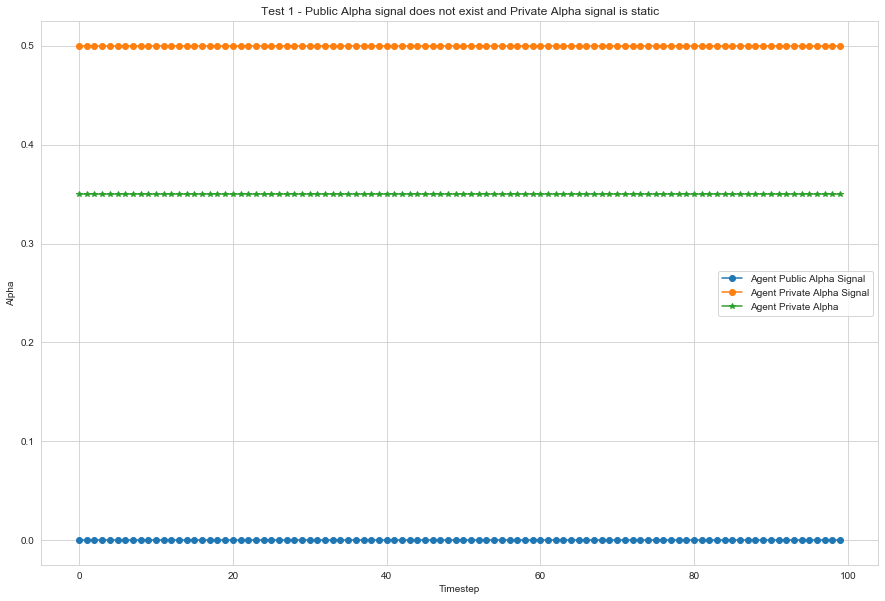

In [3]:
alpha_plot(experiments,plot_title);

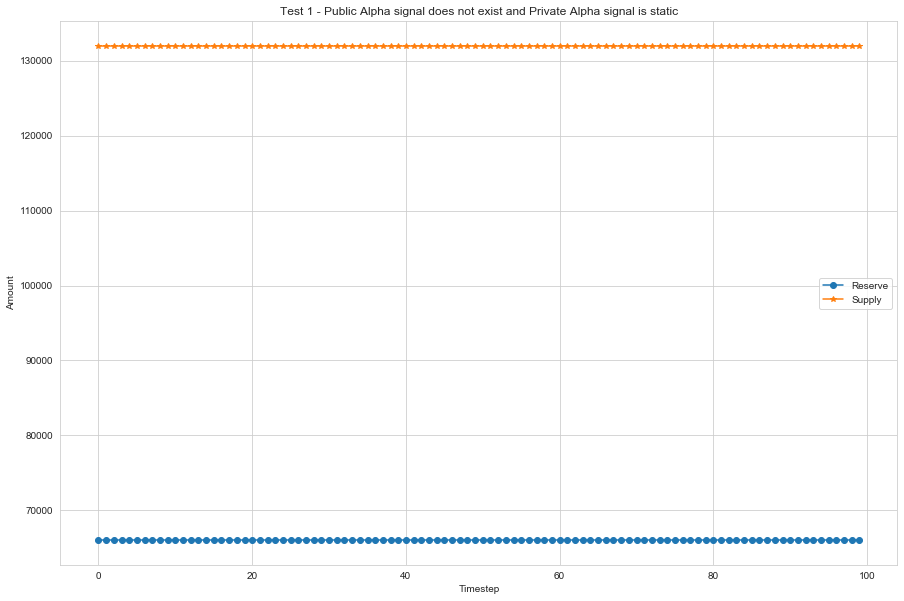

In [4]:
reserve_supply(experiments,plot_title);

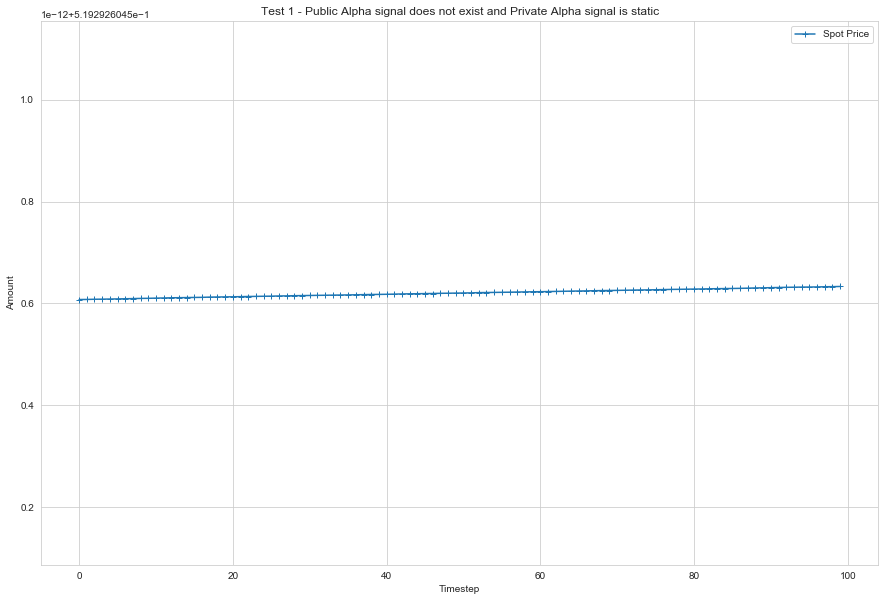

In [5]:
price(experiments,plot_title);

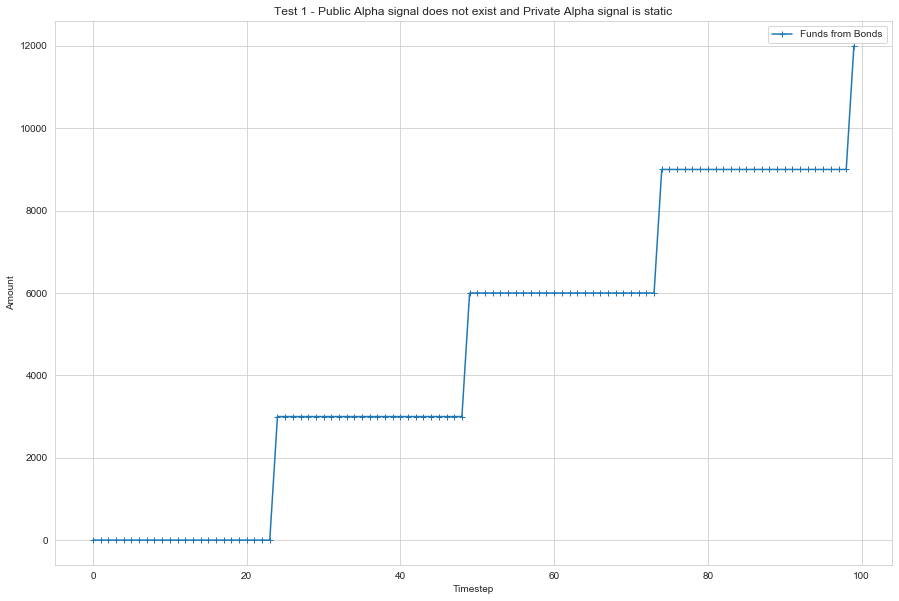

In [6]:
funds_from_bond(experiments,plot_title)

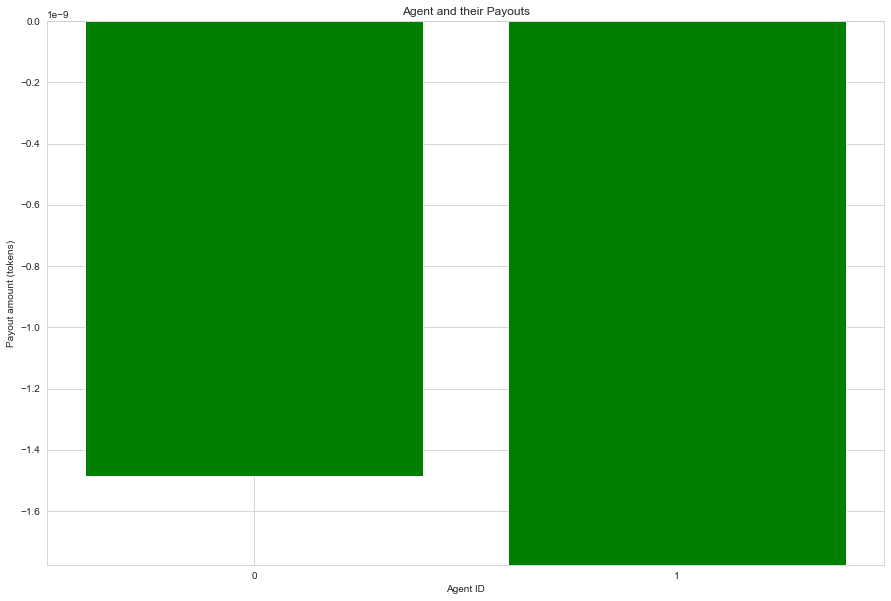

In [7]:
agent_payout_2(experiments)

The simulation results match the test case

### Test 2 (base case): Public Alpha signal does not exist and Private Alpha signal is increasing

Public Alpha signal does not exist. $$\tilde\alpha_{signal} = N/A$$ <br>
Private Alpha signal is set to be controlled and increasing $$\hat\alpha_{signal} = 0.5 + \frac{t}{t_{total}}$$ <br>
The bias $b$ is irrelevant as Public Alpha signal does not exist




Update the *update_agent_beliefs* mechanism in the [private_beliefs.py](src/sim/model/parts/private_beliefs.py) file to match what is shown below and update line 53 of [state_variables.py](src/sim/model/state_variables.py) to be 0

```
def update_agent_beliefs(params, substep, state_history, prev_state, policy_input):

    agent = prev_state['chosen_agent']
    timestep = prev_state['timestep']
    params = params[0]
    alpha_bias = params['alpha_bias']
    price_bias = params['price_bias']

    
    b_alpha = 0.3 # weight

    public_alpha_signal = 0 # - alpha_bias*((1/200)*timestep)
    private_alpha_signal = 0.5 + alpha_bias*((1/200)*timestep)

    new_private_alpha = (b_alpha)*public_alpha_signal + (1-b_alpha)*private_alpha_signal
    
    new_private_alpha = private_alpha_signal

    b_price = 0.3 # weight

    public_price_signal = 0 # - price_bias*((1/200)*timestep)
    private_price_signal = 0.5 + price_bias*((1/200)*timestep)

    new_private_price = (b_price)*public_price_signal + (1-b_price)*private_price_signal


    agent['agent_private_price'] = new_private_price
    agent['agent_private_alpha'] = new_private_alpha

    agent['agent_public_price_signal'] = public_price_signal
    agent['agent_public_alpha_signal'] = public_alpha_signal

    return 'chosen_agent', agent
```

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
# import run2

from src.sim import run

from src.sim.model.parts.utils import *

import seaborn as sns

# For analysis
import numpy as np
import pandas as pd

sns.set_style("whitegrid")

experiments = run.run()


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: multi_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (100, 19, 1, 22)
Execution Method: single_proc_exec
Execution Mode: single_threaded
Total execution time: 0.95s


In [2]:
plot_title = 'Test 2 - Public Alpha signal does not exist and Private Alpha is increasing'

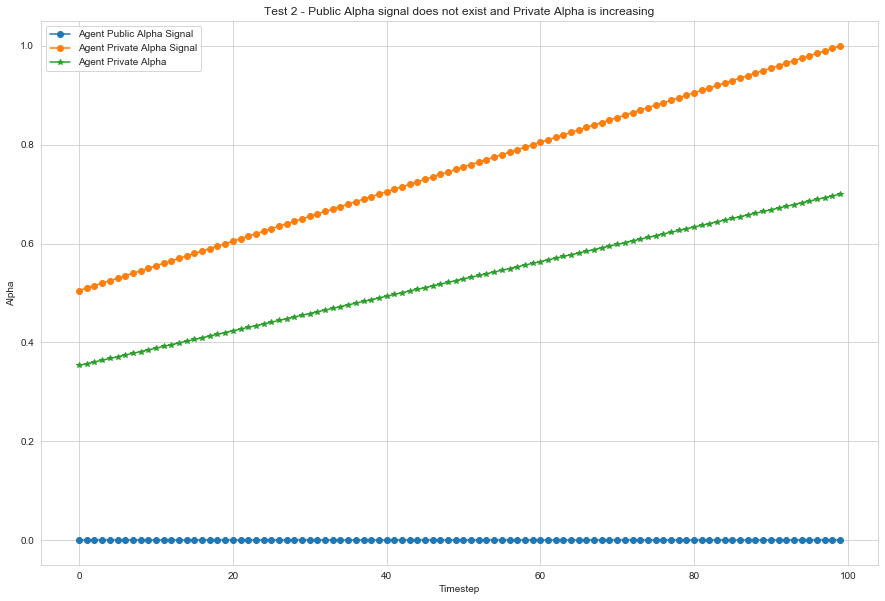

In [3]:
alpha_plot(experiments,plot_title);

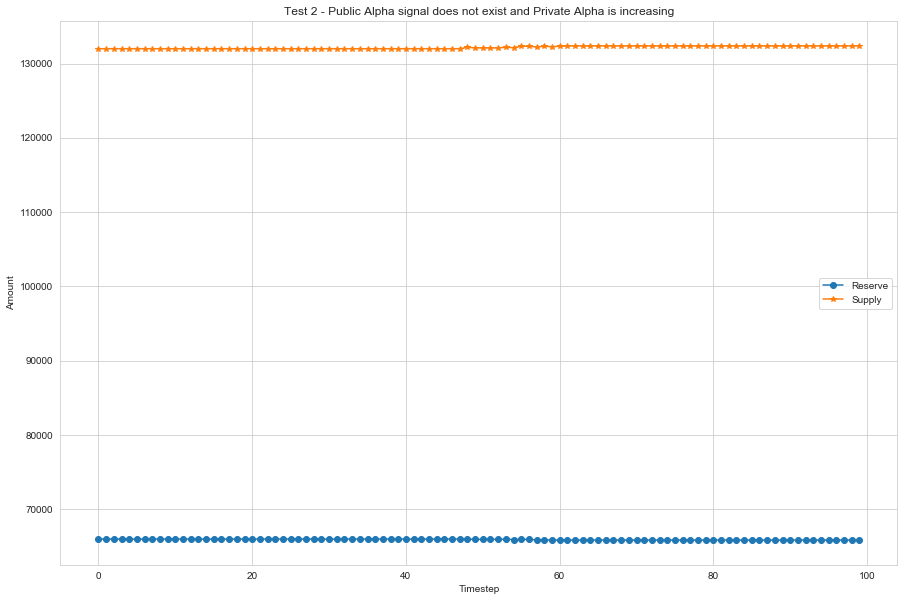

In [4]:
reserve_supply(experiments,plot_title);

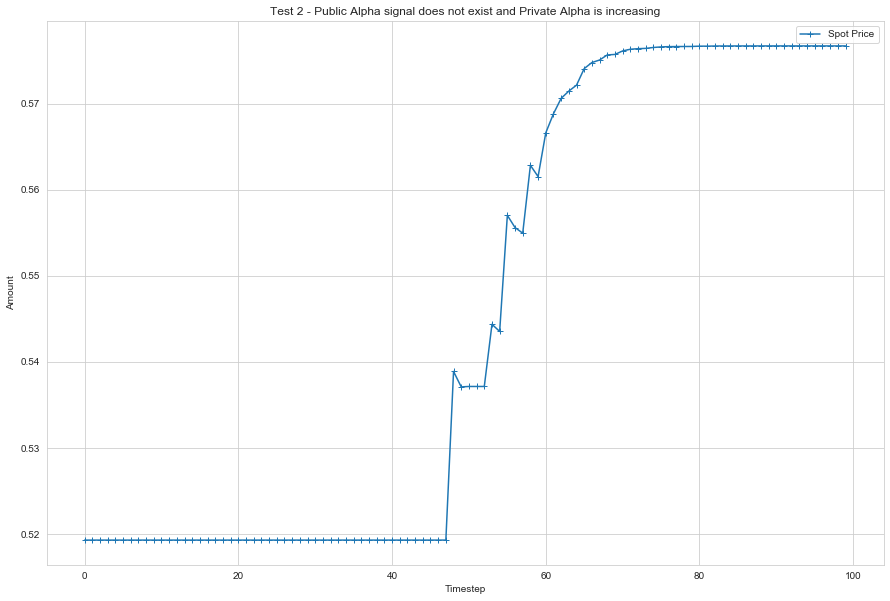

In [5]:
price(experiments,plot_title);

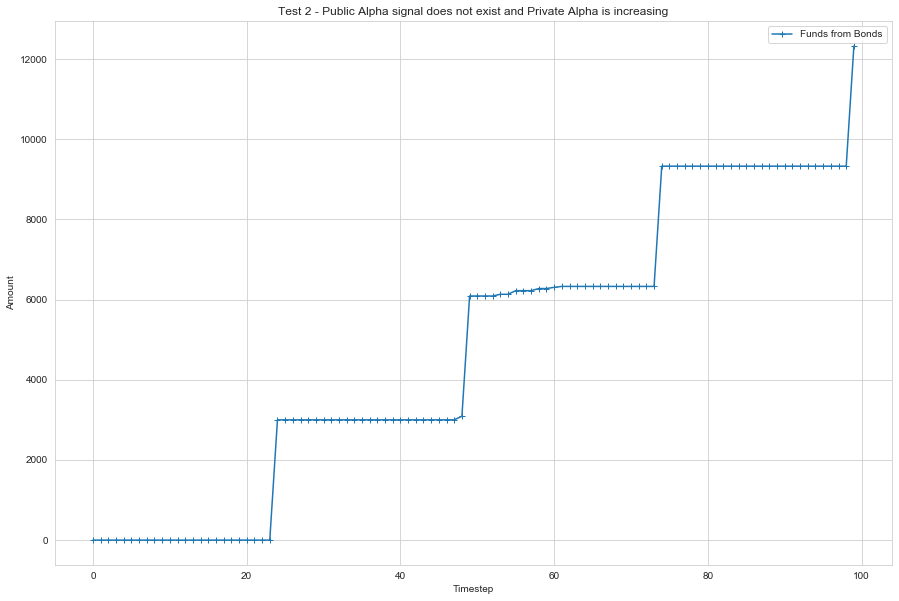

In [6]:
funds_from_bond(experiments,plot_title);

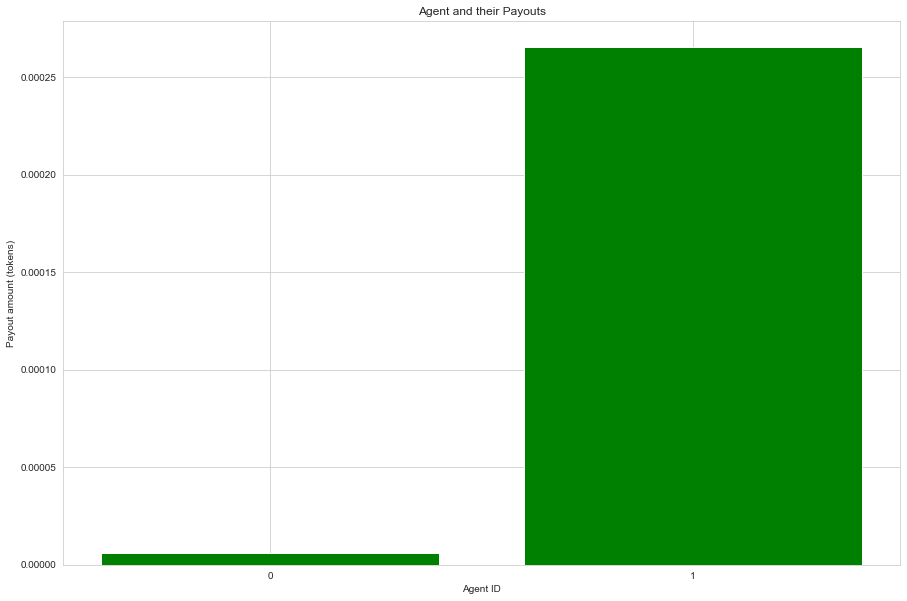

In [8]:
agent_payout_2(experiments);

The simulation results match the test case

### Test 3 (base case): Public Alpha signal does not exist and Private Alpha signal is decreasing

Public Alpha signal does not exist. $$\tilde\alpha_{signal} = N/A$$ <br>
Private Alpha signal is set to be controlled and decreasing $$\hat\alpha_{signal} = 0.5 - \frac{t}{t_{total}}$$ <br>
The bias $b$ is irrelevant as Public Alpha signal does not exist




Update the *update_agent_beliefs* mechanism in the [private_beliefs.py](src/sim/model/parts/private_beliefs.py) file to match what is shown below and update line 53 of [state_variables.py](src/sim/model/state_variables.py) to be 0

```
def update_agent_beliefs(params, substep, state_history, prev_state, policy_input):

    agent = prev_state['chosen_agent']
    timestep = prev_state['timestep']
    params = params[0]
    alpha_bias = params['alpha_bias']
    price_bias = params['price_bias']

    
    b_alpha = 0.3 # weight

    public_alpha_signal = 0 # - alpha_bias*((1/200)*timestep)
    private_alpha_signal = 0.5 - alpha_bias*((1/200)*timestep)

    new_private_alpha = (b_alpha)*public_alpha_signal + (1-b_alpha)*private_alpha_signal
    
    new_private_alpha = private_alpha_signal

    b_price = 0.3 # weight

    public_price_signal = 0 # - price_bias*((1/200)*timestep)
    private_price_signal = 0.5 - price_bias*((1/200)*timestep)

    new_private_price = (b_price)*public_price_signal + (1-b_price)*private_price_signal


    agent['agent_private_price'] = new_private_price
    agent['agent_private_alpha'] = new_private_alpha

    agent['agent_public_price_signal'] = public_price_signal
    agent['agent_public_alpha_signal'] = public_alpha_signal


    return 'chosen_agent', agent
    ```

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

from src.sim import run

from src.sim.model.parts.utils import *


import seaborn as sns

# For analysis
import numpy as np
import pandas as pd

sns.set_style("whitegrid")

experiments = run.run()


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: multi_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (100, 19, 1, 22)
Execution Method: single_proc_exec
Execution Mode: single_threaded
Total execution time: 0.78s


In [2]:
plot_title = 'Test 3 - Public Alpha signal does not exist and Private Alpha signal is decreasing'

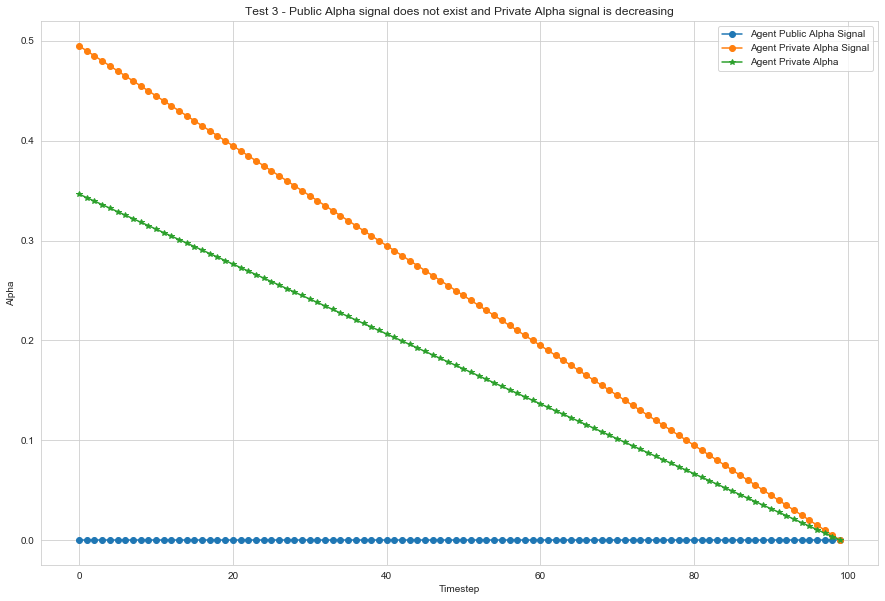

In [4]:
alpha_plot(experiments,plot_title);

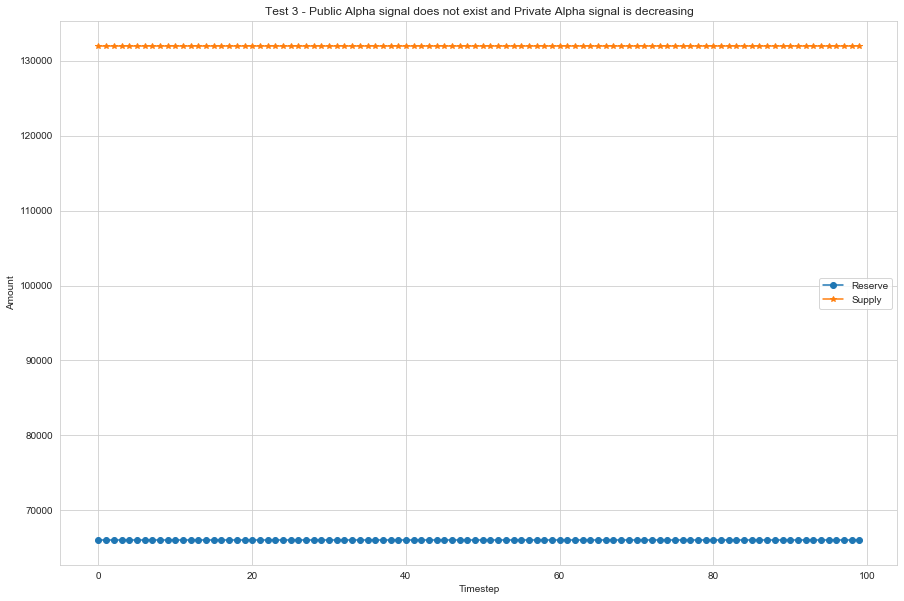

In [5]:
reserve_supply(experiments,plot_title);

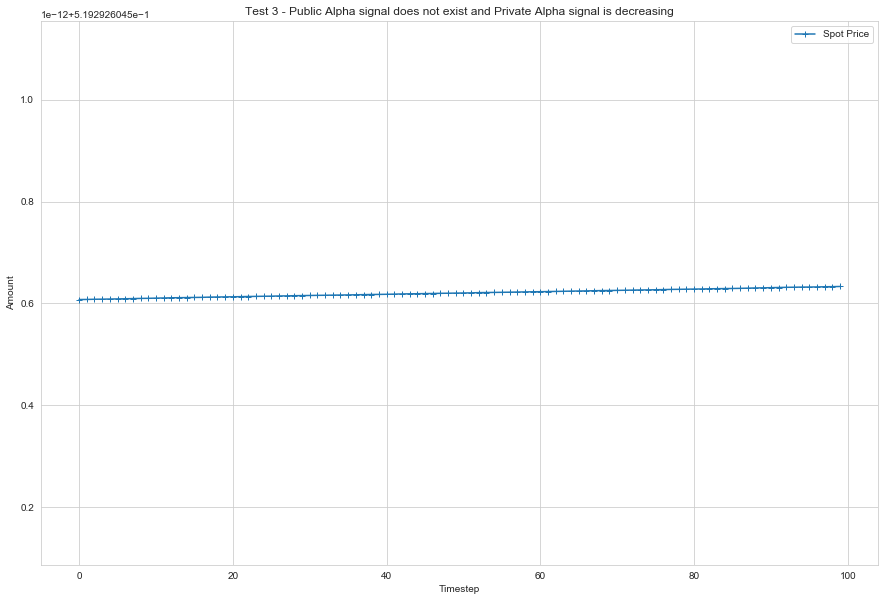

In [6]:
price(experiments,plot_title);

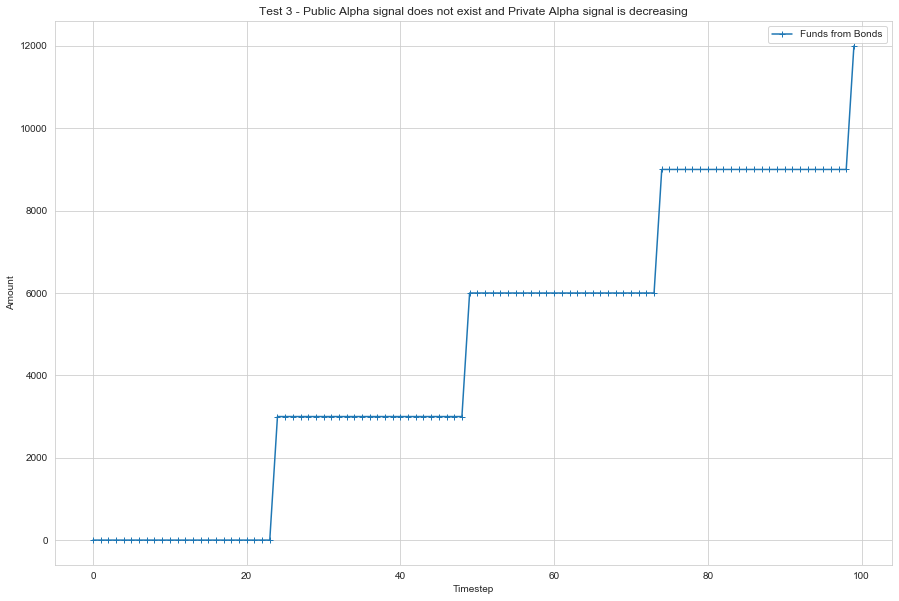

In [7]:
funds_from_bond(experiments,plot_title);

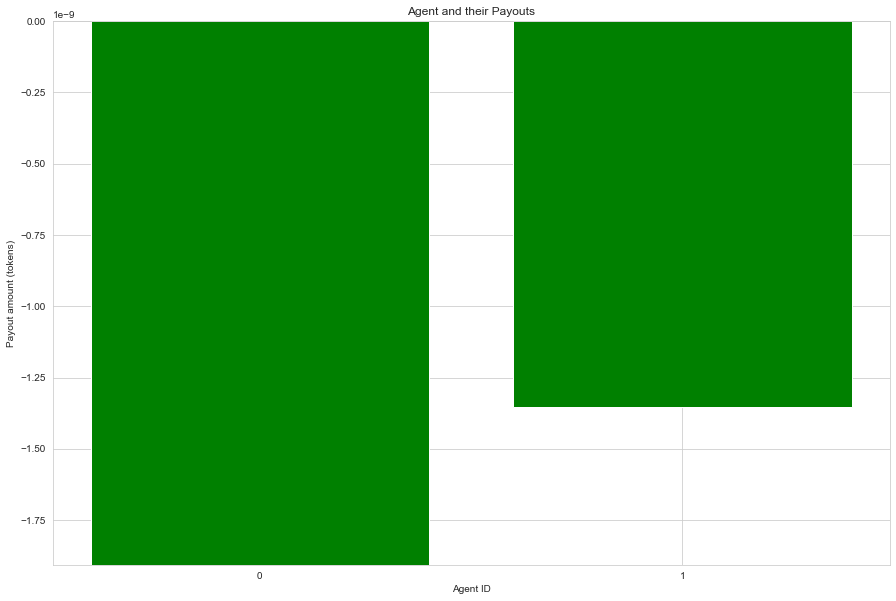

In [8]:
agent_payout_2(experiments);

The simulation results match the test case

### Test 4: Both Public Alpha signal and Private Alpha are static

Public Alpha signal is set to be controlled and static (optimisitic market) $$\tilde\alpha_{signal} = 0.9$$ Private Alpha signal is controlled and static (neutral agent) $$\hat\alpha_{signal} = 0.5$$ We set the bias $b = 0.3$ to indicate that the agent is biased towards their own private belief signal. $$b = 0.3$$




Update the *update_agent_beliefs* mechanism in the [private_beliefs.py](src/sim/model/parts/private_beliefs.py) file to match what is shown below and update line 53 of [state_variables.py](src/sim/model/state_variables.py) to be 0.9.

```
def update_agent_beliefs(params, substep, state_history, prev_state, policy_input):

    agent = prev_state['chosen_agent']
    timestep = prev_state['timestep']
    params = params[0]
    alpha_bias = params['alpha_bias']
    price_bias = params['price_bias']

    
    b_alpha = 0.3 # weight

    public_alpha_signal = 0.9 # - alpha_bias*((1/200)*timestep)
    private_alpha_signal = 0.5 #- alpha_bias*((1/200)*timestep)

    new_private_alpha = (b_alpha)*public_alpha_signal + (1-b_alpha)*private_alpha_signal
    
    new_private_alpha = private_alpha_signal

    b_price = 0.3 # weight

    public_price_signal = 0.9 # - price_bias*((1/200)*timestep)
    private_price_signal = 0.5# - price_bias*((1/200)*timestep)

    new_private_price = (b_price)*public_price_signal + (1-b_price)*private_price_signal


    agent['agent_private_price'] = new_private_price
    agent['agent_private_alpha'] = new_private_alpha

    agent['agent_public_price_signal'] = public_price_signal
    agent['agent_public_alpha_signal'] = public_alpha_signal


    return 'chosen_agent', agent
    ```

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
# import run2

from src.sim import run

from src.sim.model.parts.utils import *

import seaborn as sns

# For analysis
import numpy as np
import pandas as pd

sns.set_style("whitegrid")

experiments = run.run()


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: multi_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (100, 19, 1, 22)
Execution Method: single_proc_exec
Execution Mode: single_threaded
Total execution time: 0.75s


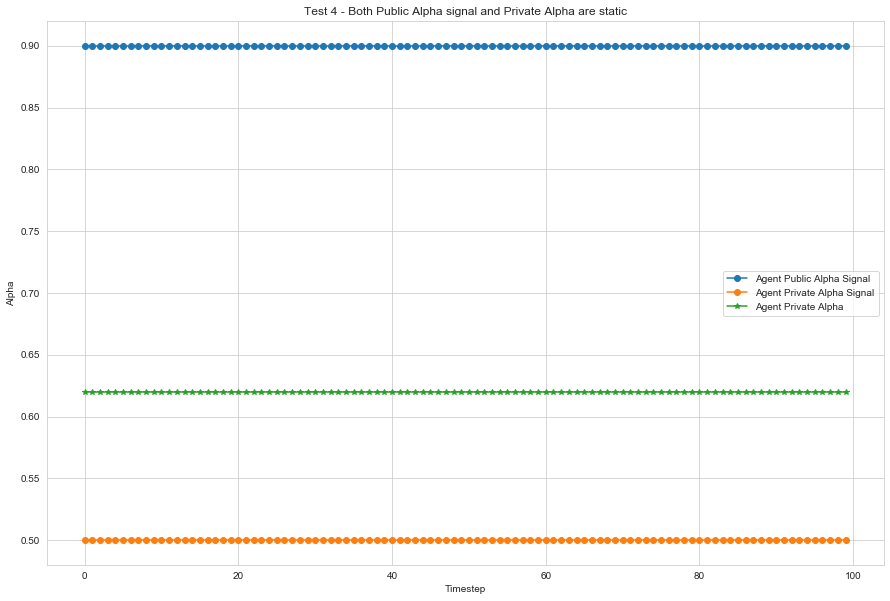

In [3]:
plot_title = 'Test 4 - Both Public Alpha signal and Private Alpha are static'

alpha_plot(experiments,plot_title);


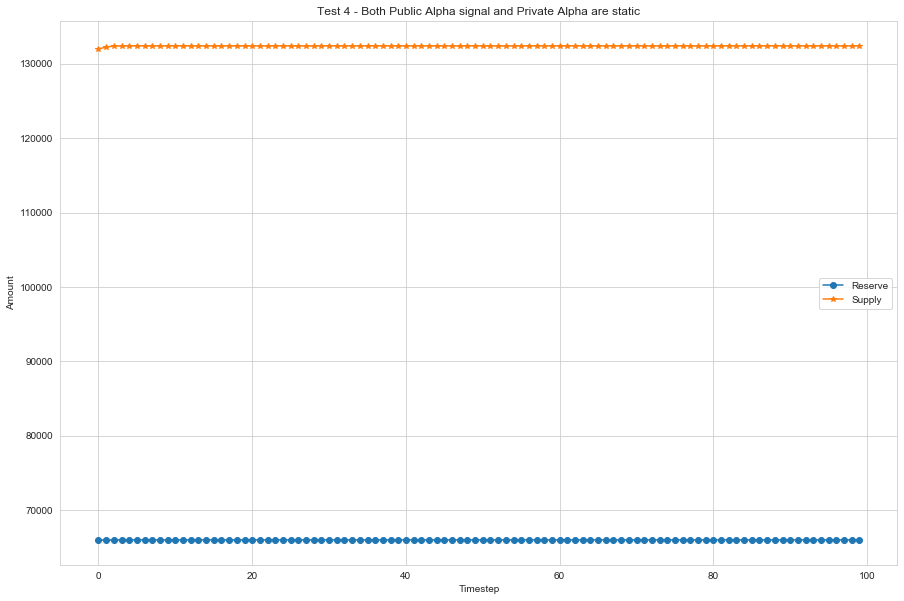

In [4]:
reserve_supply(experiments,plot_title);

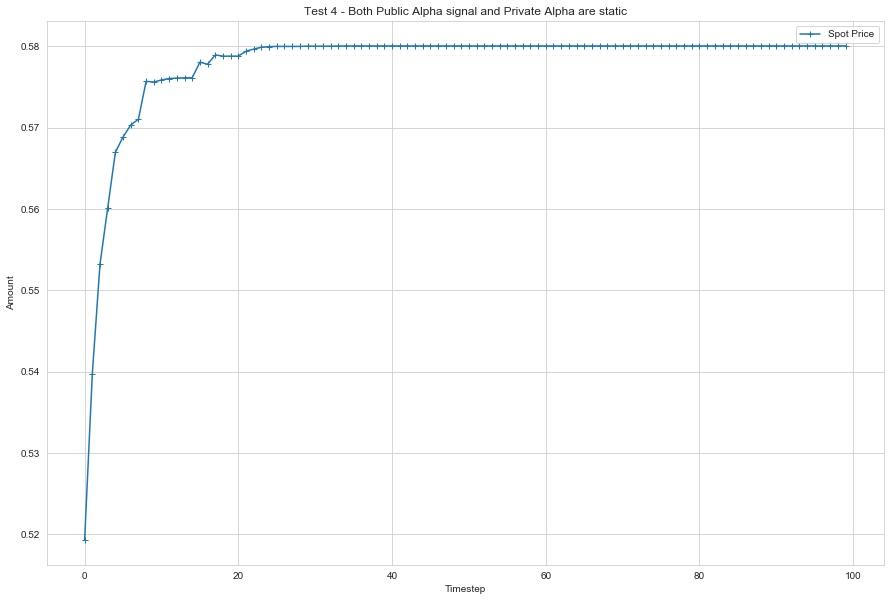

In [5]:
price(experiments,plot_title);

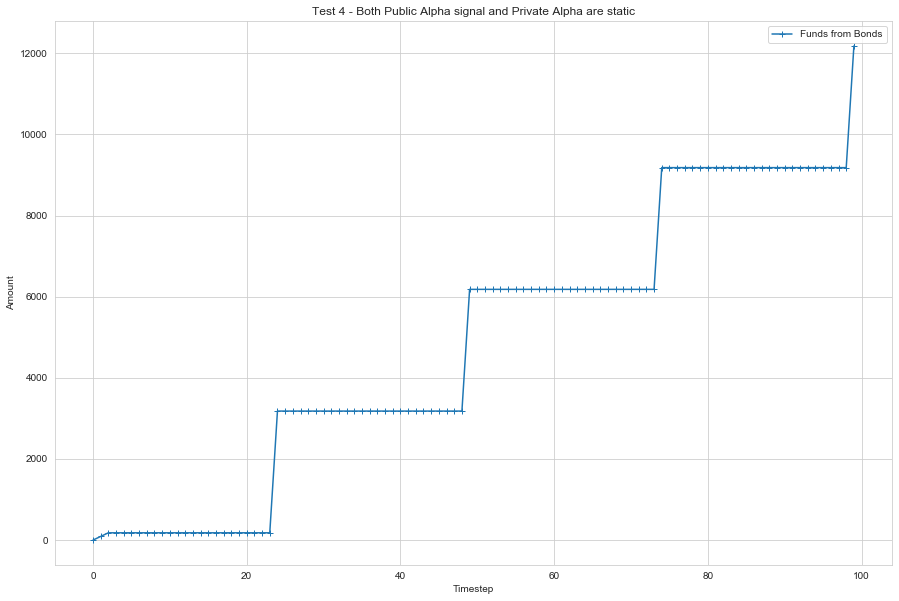

In [6]:
funds_from_bond(experiments,plot_title);

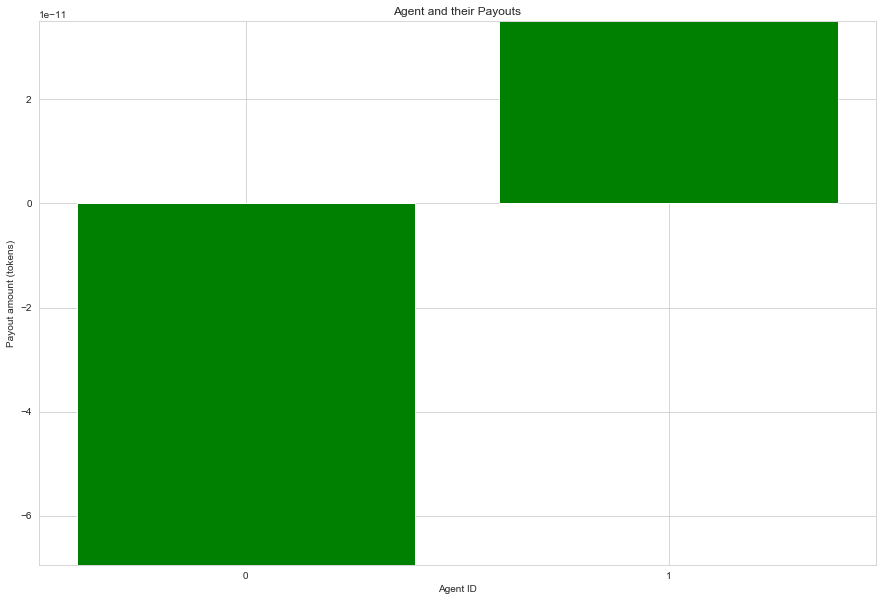

In [7]:
agent_payout_2(experiments);

The simulation results match the test case

### Test 5: Public Alpha signal is increasing and Private Alpha signal is static

Public Alpha signal is set to be controlled and increasing. $$\tilde\alpha_{signal} = 0.5 + \frac{t}{t_{total}}$$ <br>
Private Alpha signal is set to be controlled and static $$\hat\alpha_{signal} = 0.5$$ <br>
The agent has a bias towards their Private Alpha signal, thus $$b = 0.3$$




Update the *update_agent_beliefs* mechanism in the [private_beliefs.py](src/sim/model/parts/private_beliefs.py) file to match what is shown below and update line 53 of [state_variables.py](src/sim/model/state_variables.py) to be 0.5.

```
def update_agent_beliefs(params, substep, state_history, prev_state, policy_input):

    agent = prev_state['chosen_agent']
    timestep = prev_state['timestep']
    params = params[0]
    alpha_bias = params['alpha_bias']
    price_bias = params['price_bias']

    
    b_alpha = 0.3 # weight

    public_alpha_signal = 0.5 + alpha_bias*((1/200)*timestep)
    private_alpha_signal = 0.5 #- alpha_bias*((1/200)*timestep)

    new_private_alpha = (b_alpha)*public_alpha_signal + (1-b_alpha)*private_alpha_signal
    
    new_private_alpha = private_alpha_signal

    b_price = 0.3 # weight

    public_price_signal = 0.5 + price_bias*((1/200)*timestep)
    private_price_signal = 0.5# - price_bias*((1/200)*timestep)

    new_private_price = (b_price)*public_price_signal + (1-b_price)*private_price_signal


    agent['agent_private_price'] = new_private_price
    agent['agent_private_alpha'] = new_private_alpha

    agent['agent_public_price_signal'] = public_price_signal
    agent['agent_public_alpha_signal'] = public_alpha_signal


    return 'chosen_agent', agent
```

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
# import run2

from src.sim import run

from src.sim.model.parts.utils import *

import seaborn as sns

# For analysis
import numpy as np
import pandas as pd

sns.set_style("whitegrid")

experiments = run.run()


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: multi_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (100, 19, 1, 22)
Execution Method: single_proc_exec
Execution Mode: single_threaded
Total execution time: 0.93s


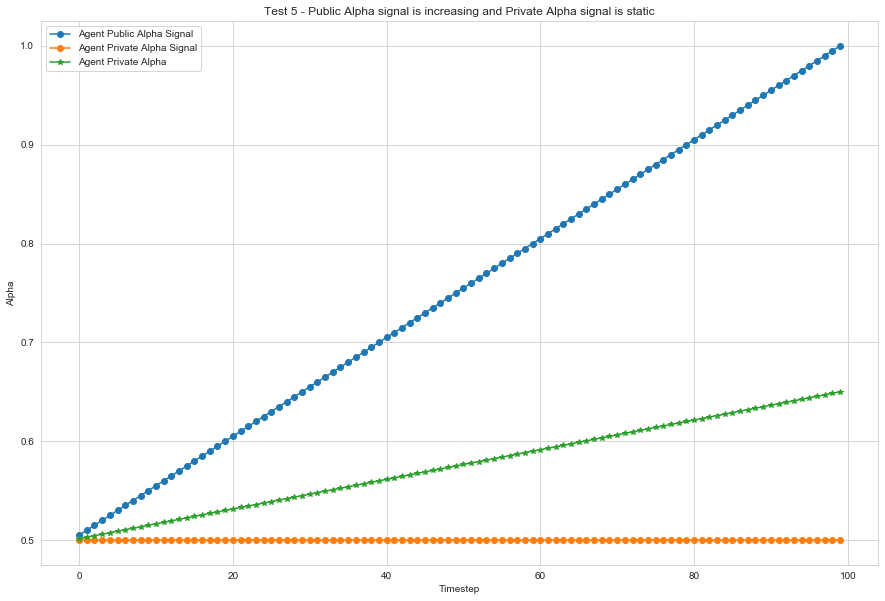

In [2]:
plot_title = 'Test 5 - Public Alpha signal is increasing and Private Alpha signal is static'

alpha_plot(experiments,plot_title);

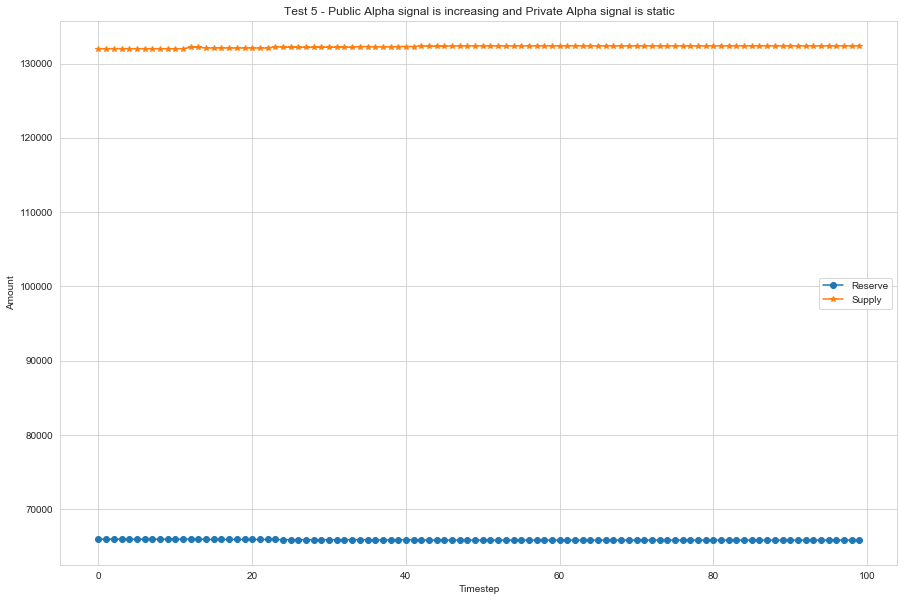

In [3]:
reserve_supply(experiments,plot_title);

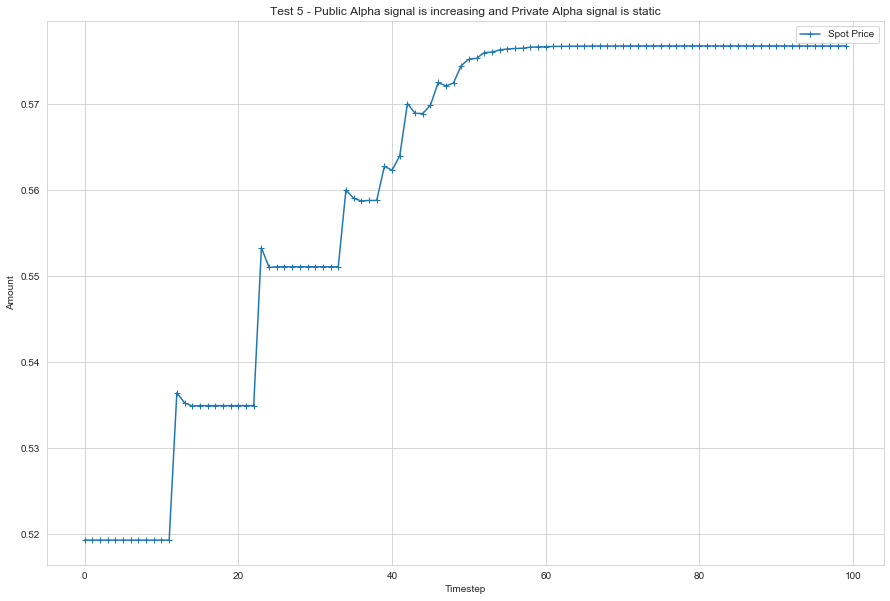

In [4]:
price(experiments,plot_title);

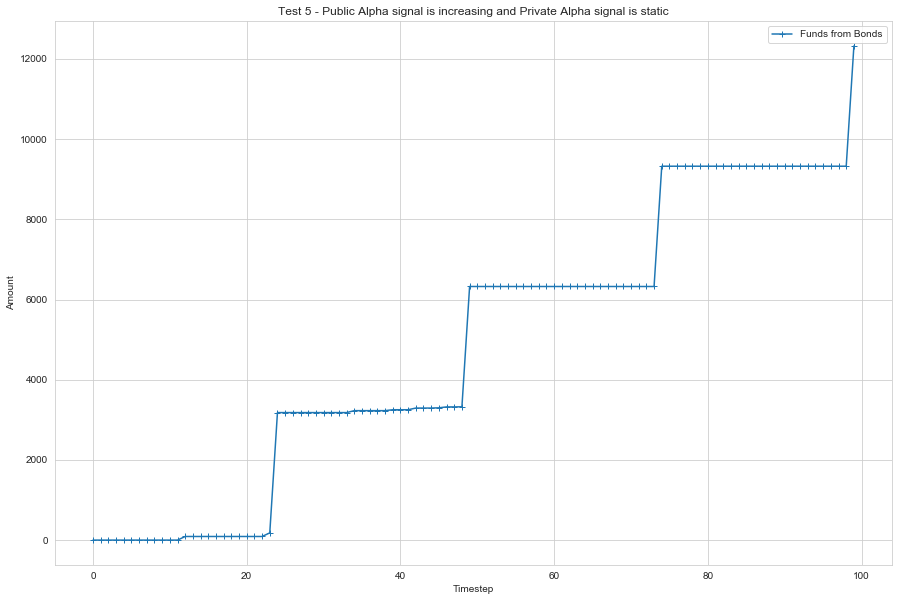

In [5]:
funds_from_bond(experiments,plot_title);

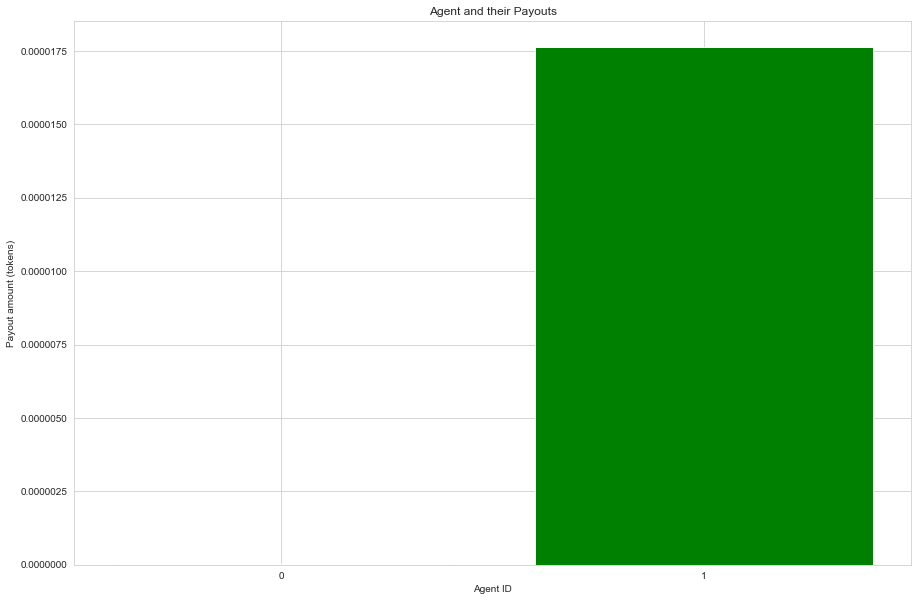

In [6]:
agent_payout_2(experiments);

The simulation results match the test case

### Test 6: Public Alpha signal is decreasing and Private Alpha signal is static

Public Alpha signal is set to be controlled and decreasing. $$\tilde\alpha_{signal} = 0.5 - \frac{t}{t_{total}}$$ <br>
Private Alpha signal is set to be controlled and static. $$\hat\alpha_{signal} = 0.5$$ <br>
The agent has a bias towards their Private Alpha signal, thus $$b = 0.3$$




Update the *update_agent_beliefs* mechanism in the [private_beliefs.py](src/sim/model/parts/private_beliefs.py) file to match what is shown below and update line 53 of [state_variables.py](src/sim/model/state_variables.py) to be 0.5.

```
def update_agent_beliefs(params, substep, state_history, prev_state, policy_input):

    agent = prev_state['chosen_agent']
    timestep = prev_state['timestep']
    params = params[0]
    alpha_bias = params['alpha_bias']
    price_bias = params['price_bias']

    
    b_alpha = 0.3 # weight

    public_alpha_signal = 0.5 - alpha_bias*((1/200)*timestep)
    private_alpha_signal = 0.5 #- alpha_bias*((1/200)*timestep)

    new_private_alpha = (b_alpha)*public_alpha_signal + (1-b_alpha)*private_alpha_signal
    
    new_private_alpha = private_alpha_signal

    b_price = 0.3 # weight

    public_price_signal = 0.5 - price_bias*((1/200)*timestep)
    private_price_signal = 0.5# - price_bias*((1/200)*timestep)

    new_private_price = (b_price)*public_price_signal + (1-b_price)*private_price_signal


    agent['agent_private_price'] = new_private_price
    agent['agent_private_alpha'] = new_private_alpha

    agent['agent_public_price_signal'] = public_price_signal
    agent['agent_public_alpha_signal'] = public_alpha_signal


    return 'chosen_agent', agent
    ```

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
# import run2

from src.sim import run

from src.sim.model.parts.utils import *

import seaborn as sns

# For analysis
import numpy as np
import pandas as pd

sns.set_style("whitegrid")

experiments = run.run()


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: multi_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (100, 19, 1, 22)
Execution Method: single_proc_exec
Execution Mode: single_threaded
Total execution time: 0.81s


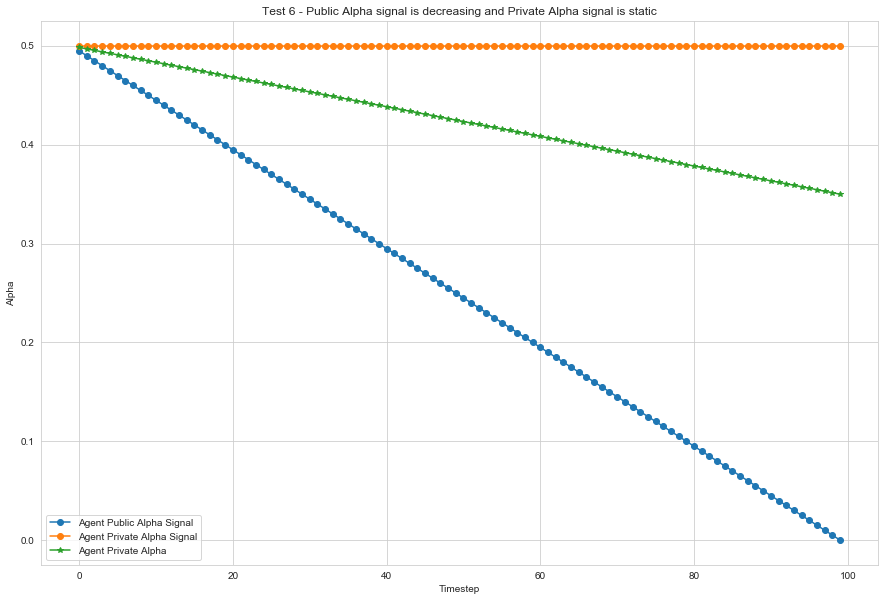

In [2]:
plot_title = 'Test 6 - Public Alpha signal is decreasing and Private Alpha signal is static'

alpha_plot(experiments,plot_title);

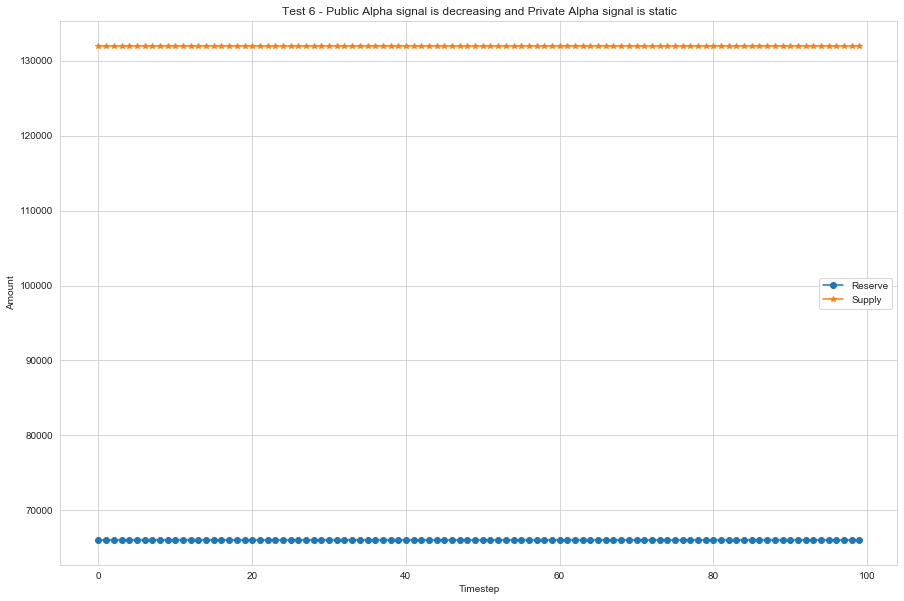

In [3]:
reserve_supply(experiments,plot_title);

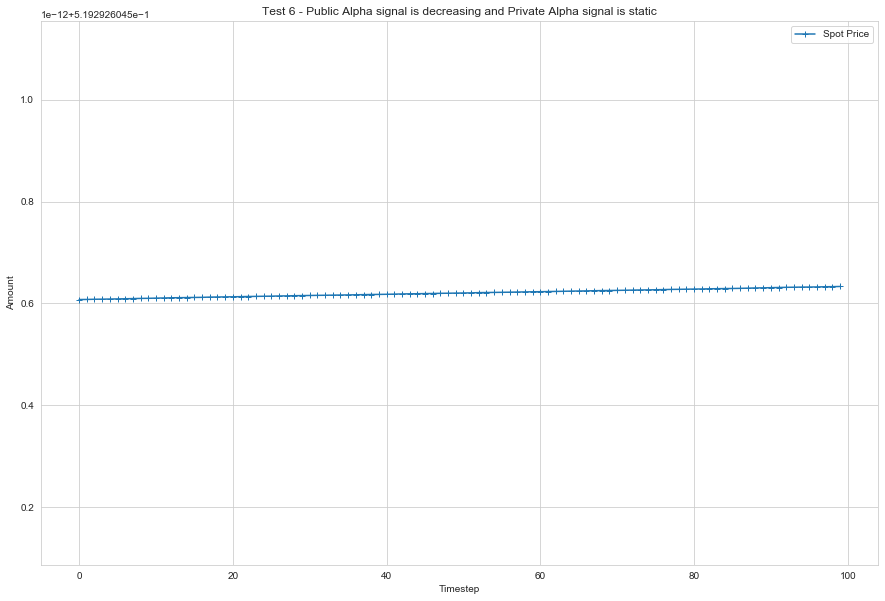

In [5]:
price(experiments,plot_title);

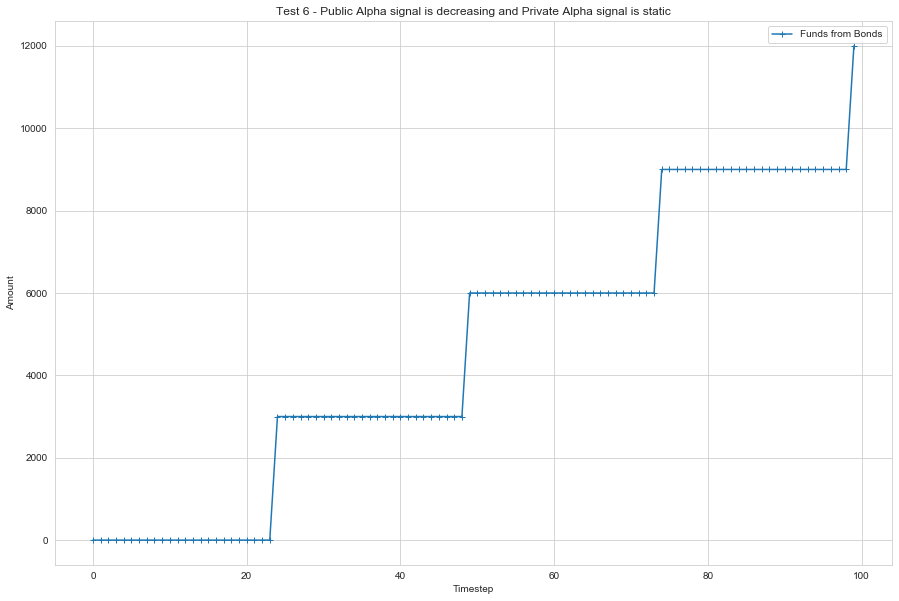

In [6]:
funds_from_bond(experiments,plot_title);

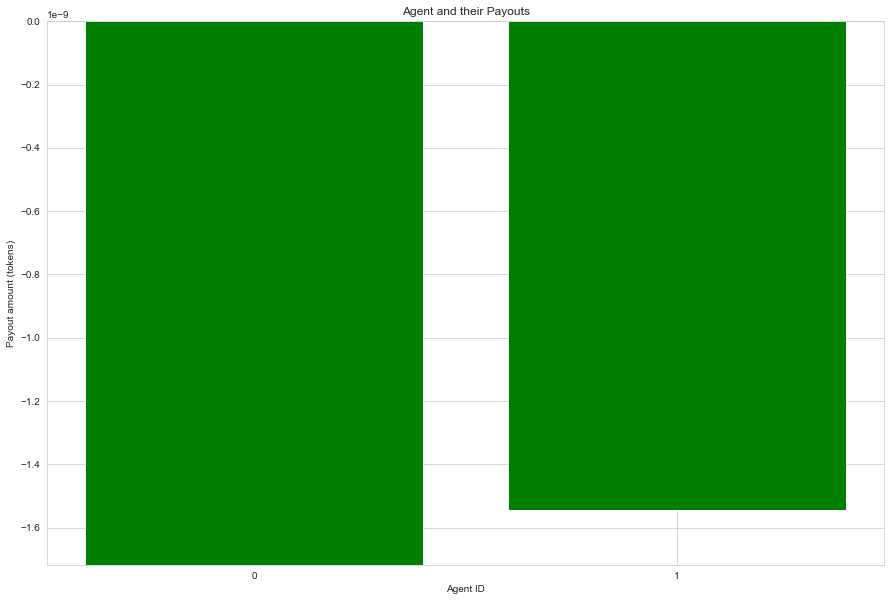

In [7]:
agent_payout_2(experiments);

The simulation results match the test case

### Test 7: Public Alpha signal is static and Private Alpha signal is increasing

Public Alpha signal is set to be controlled and static. $$\tilde\alpha_{signal} = 0.5$$ <br>
Private Alpha signal is set to be controlled and increasing $$\hat\alpha_{signal} = 0.5 + \frac{t}{t_{total}}$$ <br>
The agent has a bias towards their Private Alpha signal, thus $$b = 0.3$$




Update the *update_agent_beliefs* mechanism in the [private_beliefs.py](src/sim/model/parts/private_beliefs.py) file to match what is shown below and update line 53 of [state_variables.py](src/sim/model/state_variables.py) to be 0.5.

```
def update_agent_beliefs(params, substep, state_history, prev_state, policy_input):

    agent = prev_state['chosen_agent']
    timestep = prev_state['timestep']
    params = params[0]
    alpha_bias = params['alpha_bias']
    price_bias = params['price_bias']

    
    b_alpha = 0.3 # weight

    public_alpha_signal = 0.5 #- alpha_bias*((1/200)*timestep)
    private_alpha_signal = 0.5 + alpha_bias*((1/200)*timestep)

    new_private_alpha = (b_alpha)*public_alpha_signal + (1-b_alpha)*private_alpha_signal
    
    new_private_alpha = private_alpha_signal

    b_price = 0.3 # weight

    public_price_signal = 0.5# - price_bias*((1/200)*timestep)
    private_price_signal = 0.5 +  price_bias*((1/200)*timestep)

    new_private_price = (b_price)*public_price_signal + (1-b_price)*private_price_signal


    agent['agent_private_price'] = new_private_price
    agent['agent_private_alpha'] = new_private_alpha

    agent['agent_public_price_signal'] = public_price_signal
    agent['agent_public_alpha_signal'] = public_alpha_signal


    return 'chosen_agent', agent
    ```

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
# import run2

from src.sim import run

from src.sim.model.parts.utils import *

import seaborn as sns

# For analysis
import numpy as np
import pandas as pd

sns.set_style("whitegrid")

experiments = run.run()


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: multi_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (100, 19, 1, 22)
Execution Method: single_proc_exec
Execution Mode: single_threaded
Total execution time: 0.79s


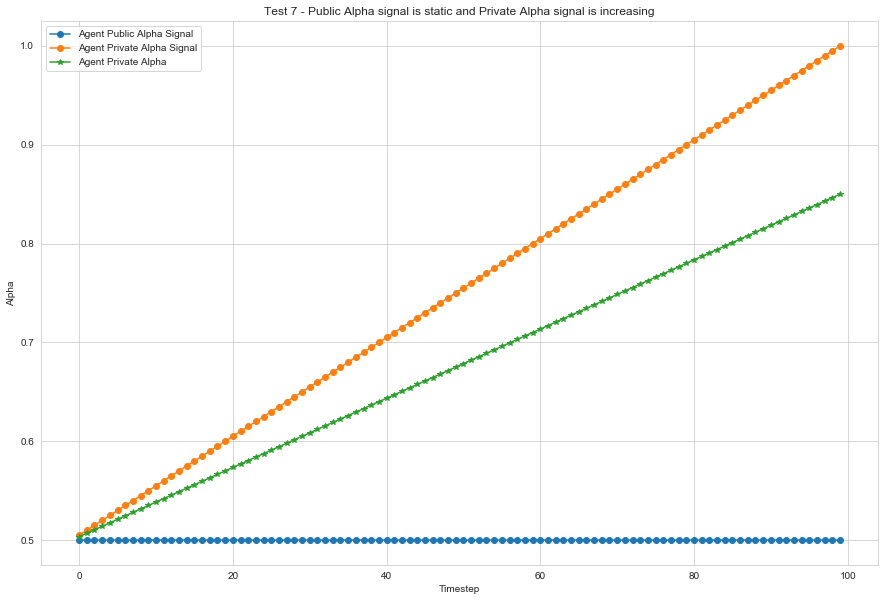

In [2]:
plot_title = 'Test 7 - Public Alpha signal is static and Private Alpha signal is increasing'

alpha_plot(experiments,plot_title);

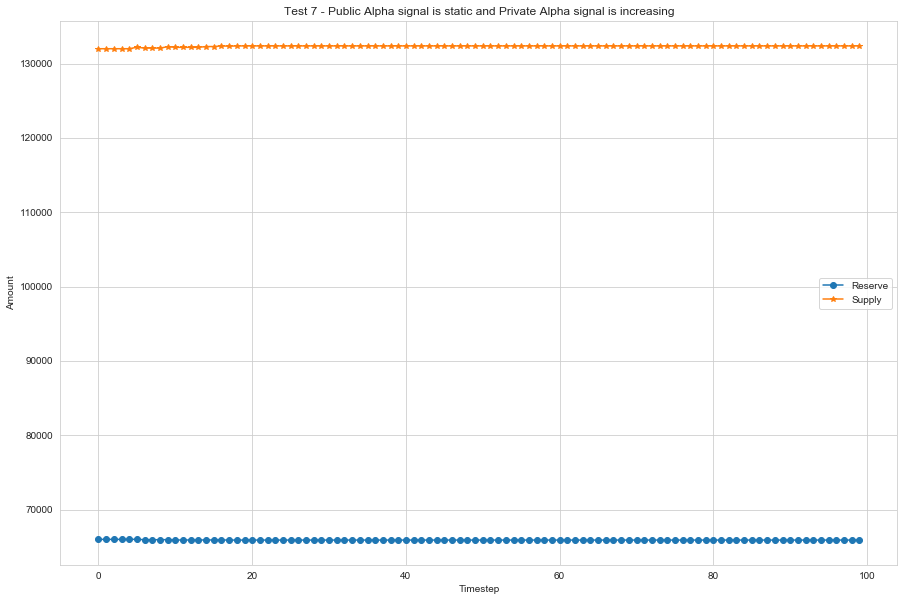

In [3]:
reserve_supply(experiments,plot_title);

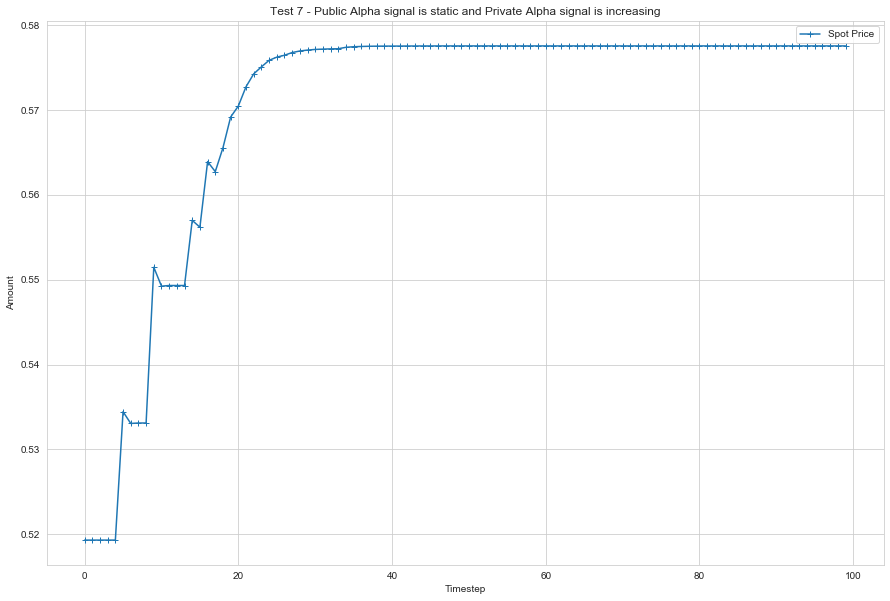

In [4]:
price(experiments,plot_title);

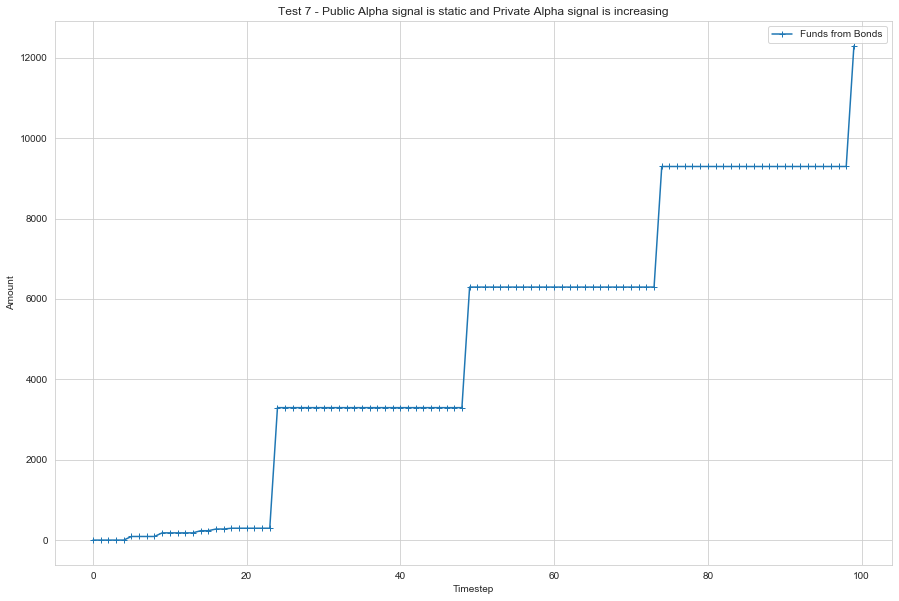

In [5]:
funds_from_bond(experiments,plot_title);

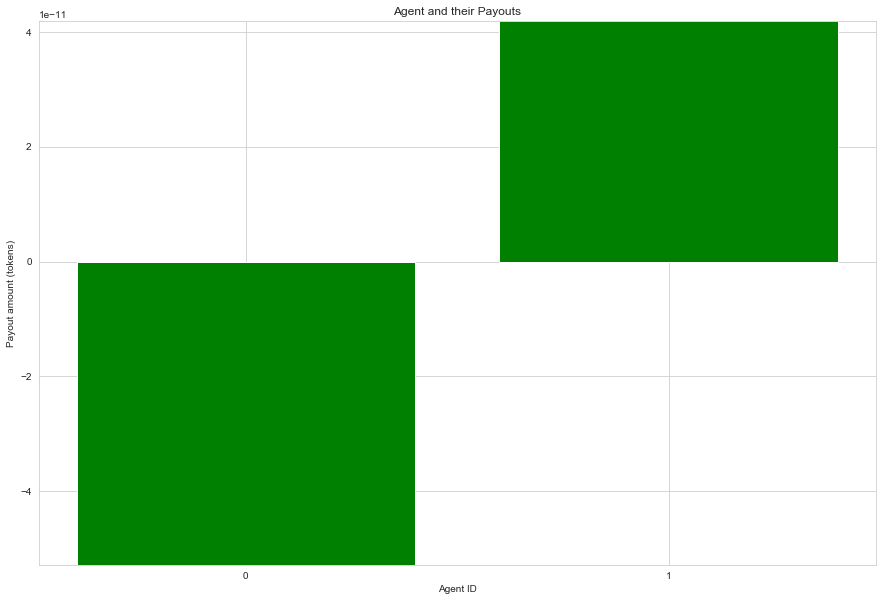

In [6]:
agent_payout_2(experiments);

The simulation results match the test case

### Test 8: Public Alpha signal is static and Private Alpha signal is decreasing

Public Alpha signal is set to be controlled and static. $$\tilde\alpha_{signal} = 0.5$$ <br>
Private Alpha signal is set to be controlled and decreasing $$\hat\alpha_{signal} = 0.5 - \frac{t}{t_{total}}$$ <br>
The agent has a bias towards their Private Alpha signal, thus $$b = 0.3$$




Update the *update_agent_beliefs* mechanism in the [private_beliefs.py](src/sim/model/parts/private_beliefs.py) file to match what is shown below and update line 53 of [state_variables.py](src/sim/model/state_variables.py) to be 0.5.

```
def update_agent_beliefs(params, substep, state_history, prev_state, policy_input):

    agent = prev_state['chosen_agent']
    timestep = prev_state['timestep']
    params = params[0]
    alpha_bias = params['alpha_bias']
    price_bias = params['price_bias']

    
    b_alpha = 0.3 # weight

    public_alpha_signal = 0.5 #- alpha_bias*((1/200)*timestep)
    private_alpha_signal = 0.5 - alpha_bias*((1/200)*timestep)

    new_private_alpha = (b_alpha)*public_alpha_signal + (1-b_alpha)*private_alpha_signal
    
    new_private_alpha = private_alpha_signal

    b_price = 0.3 # weight

    public_price_signal = 0.5# - price_bias*((1/200)*timestep)
    private_price_signal = 0.5 -  price_bias*((1/200)*timestep)

    new_private_price = (b_price)*public_price_signal + (1-b_price)*private_price_signal


    agent['agent_private_price'] = new_private_price
    agent['agent_private_alpha'] = new_private_alpha

    agent['agent_public_price_signal'] = public_price_signal
    agent['agent_public_alpha_signal'] = public_alpha_signal


    return 'chosen_agent', agent
```

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
# import run2

from src.sim import run

from src.sim.model.parts.utils import *

import seaborn as sns

# For analysis
import numpy as np
import pandas as pd

sns.set_style("whitegrid")

experiments = run.run()


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: multi_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (100, 19, 1, 22)
Execution Method: single_proc_exec
Execution Mode: single_threaded
Total execution time: 0.77s


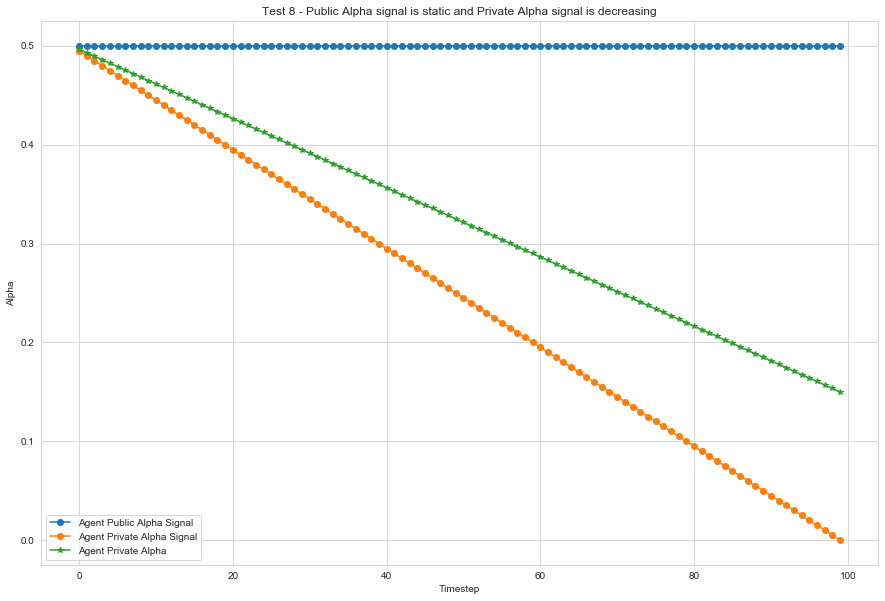

In [3]:
plot_title = 'Test 8 - Public Alpha signal is static and Private Alpha signal is decreasing'

alpha_plot(experiments,plot_title);

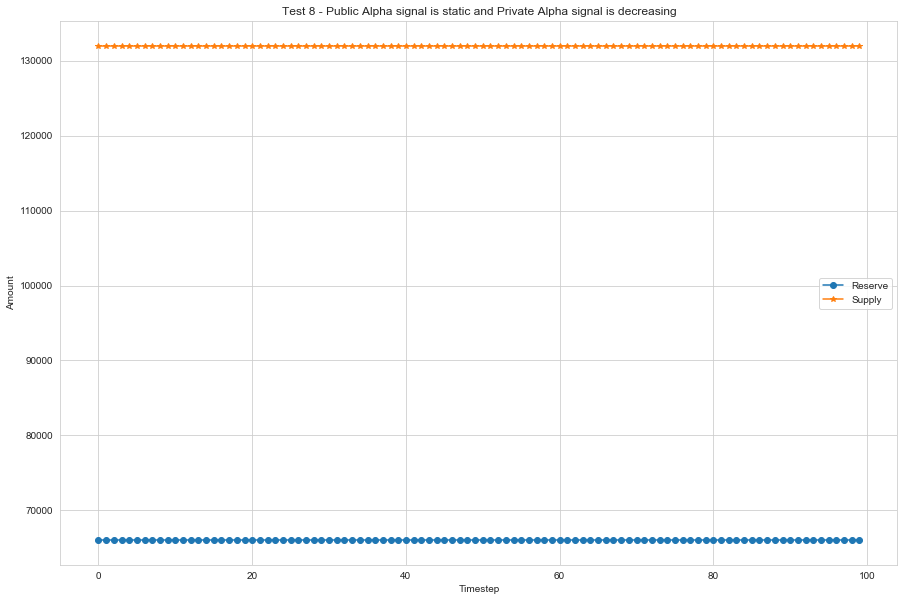

In [4]:
reserve_supply(experiments,plot_title);

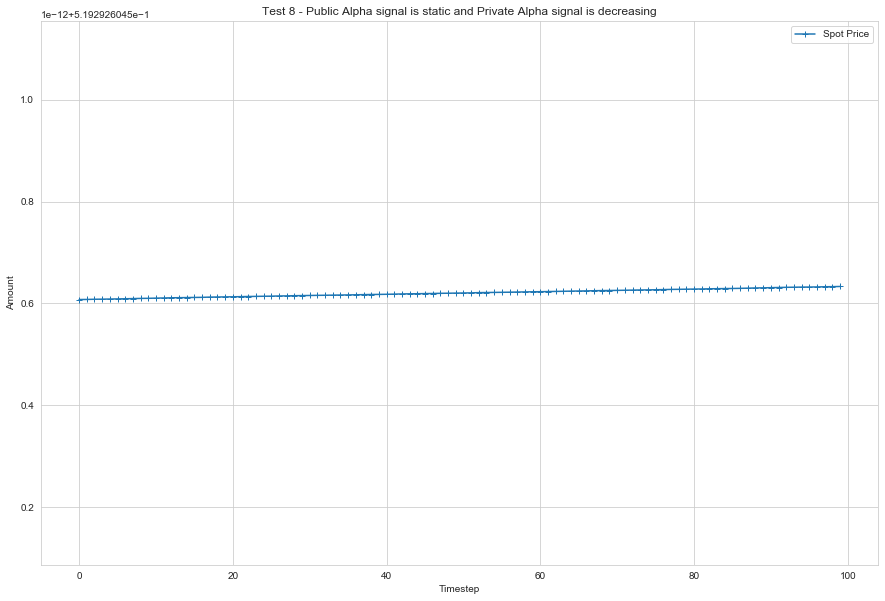

In [5]:
price(experiments,plot_title);

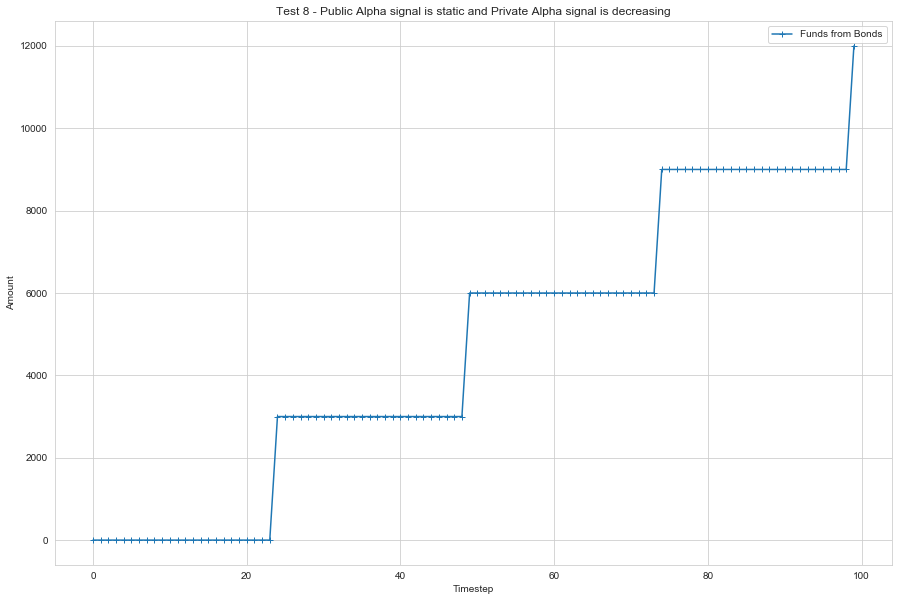

In [6]:
funds_from_bond(experiments,plot_title);

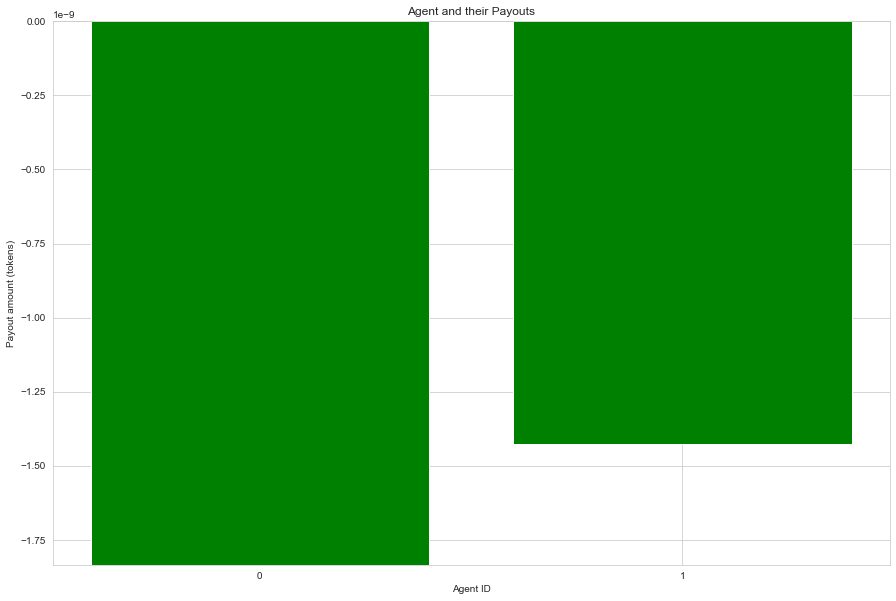

In [7]:
agent_payout_2(experiments);

The simulation results match the test case

### Test 9: Public Alpha signal is increasing and Private Alpha signal is increasing

Public Alpha signal is set to be controlled and increasing. $$\tilde\alpha_{signal} = 0.5 + \frac{t}{t_{total}}$$ <br>
Private Alpha signal is set to be controlled and increasing $$\hat\alpha_{signal} = 0.5 + \frac{t}{t_{total}}$$ <br>
The agent has a bias towards their Private Alpha signal, thus $$b = 0.3$$




Update the *update_agent_beliefs* mechanism in the [private_beliefs.py](src/sim/model/parts/private_beliefs.py) file to match what is shown below and update line 53 of [state_variables.py](src/sim/model/state_variables.py) to be 0.5.

```
def update_agent_beliefs(params, substep, state_history, prev_state, policy_input):

    agent = prev_state['chosen_agent']
    timestep = prev_state['timestep']
    params = params[0]
    alpha_bias = params['alpha_bias']
    price_bias = params['price_bias']

    
    b_alpha = 0.3 # weight

    public_alpha_signal = 0.5 + alpha_bias*((1/200)*timestep)
    private_alpha_signal = 0.5 + alpha_bias*((1/200)*timestep)

    new_private_alpha = (b_alpha)*public_alpha_signal + (1-b_alpha)*private_alpha_signal
    
    #new_private_alpha = private_alpha_signal

    b_price = 0.3 # weight

    public_price_signal = 0.5 + price_bias*((1/200)*timestep)
    private_price_signal = 0.5 +  price_bias*((1/200)*timestep)

    new_private_price = (b_price)*public_price_signal + (1-b_price)*private_price_signal


    agent['agent_private_price'] = new_private_price
    agent['agent_private_alpha'] = new_private_alpha

    agent['agent_public_price_signal'] = public_price_signal
    agent['agent_public_alpha_signal'] = public_alpha_signal


    return 'chosen_agent', agent
```

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
# import run2

from src.sim import run

from src.sim.model.parts.utils import *

import seaborn as sns

# For analysis
import numpy as np
import pandas as pd

sns.set_style("whitegrid")

experiments = run.run()


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: multi_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (100, 19, 1, 22)
Execution Method: single_proc_exec
Execution Mode: single_threaded
Total execution time: 0.96s


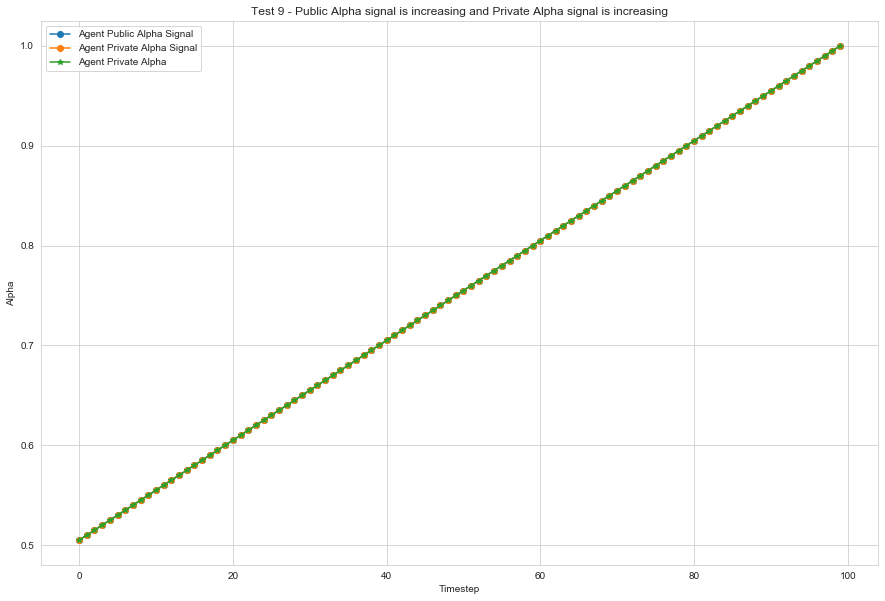

In [2]:
plot_title = 'Test 9 - Public Alpha signal is increasing and Private Alpha signal is increasing'

alpha_plot(experiments,plot_title);

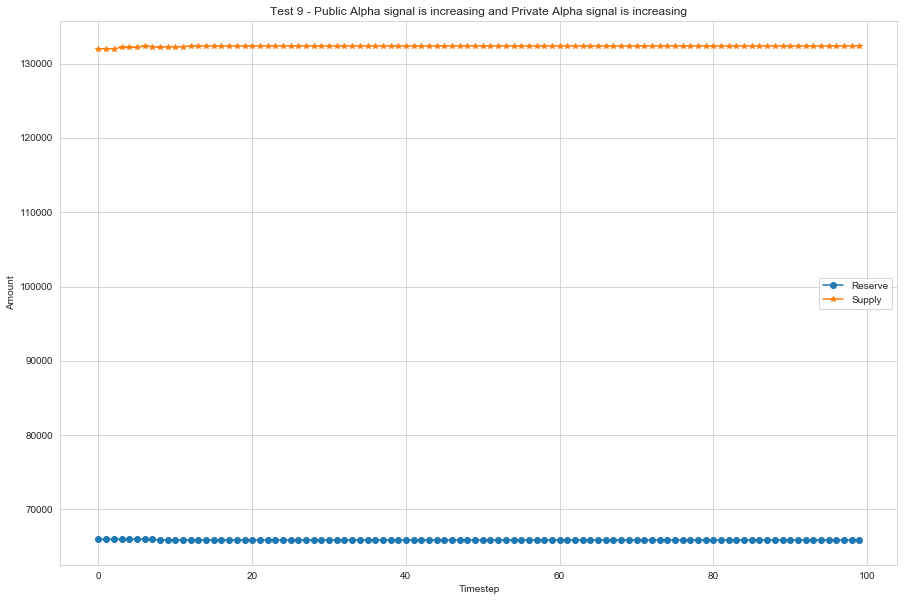

In [3]:
reserve_supply(experiments,plot_title);

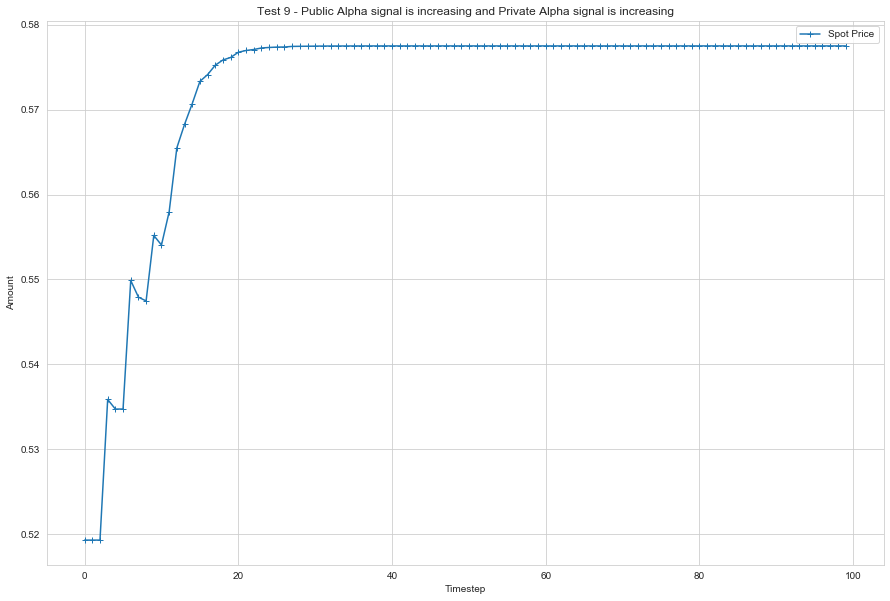

In [4]:
price(experiments,plot_title);

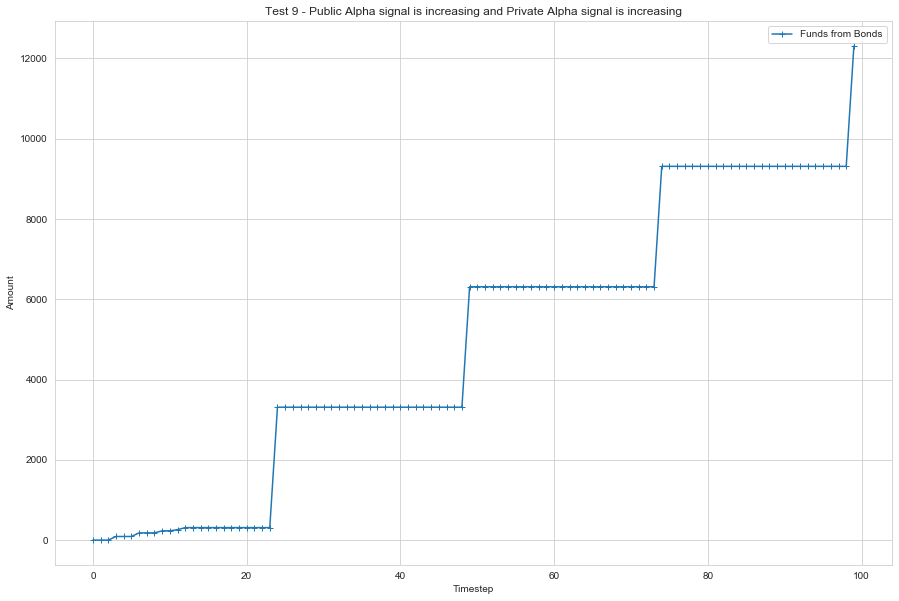

In [5]:
funds_from_bond(experiments,plot_title);

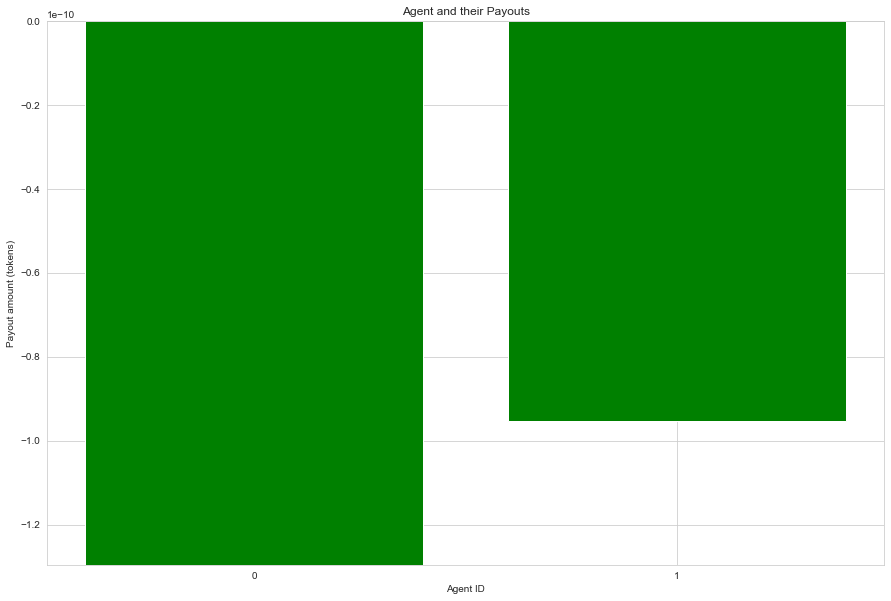

In [6]:
agent_payout_2(experiments);

The simulation results match the test case

### Test 10: Public Alpha signal is decreasing and Private Alpha signal is increasing

Public Alpha signal is set to be controlled and decreasing. $$\tilde\alpha_{signal} = 0.5 - \frac{t}{t_{total}}$$ <br>
Private Alpha signal is set to be controlled and increasing $$\hat\alpha_{signal} = 0.5 + \frac{t}{t_{total}}$$ <br>
The agent has a bias towards their Private Alpha signal, thus $$b = 0.3$$




Update the *update_agent_beliefs* mechanism in the [private_beliefs.py](src/sim/model/parts/private_beliefs.py) file to match what is shown below and update line 53 of [state_variables.py](src/sim/model/state_variables.py) to be 0.5.

```
def update_agent_beliefs(params, substep, state_history, prev_state, policy_input):

    agent = prev_state['chosen_agent']
    timestep = prev_state['timestep']
    params = params[0]
    alpha_bias = params['alpha_bias']
    price_bias = params['price_bias']

    
    b_alpha = 0.3 # weight

    public_alpha_signal = 0.5 - alpha_bias*((1/200)*timestep)
    private_alpha_signal = 0.5 + alpha_bias*((1/200)*timestep)

    new_private_alpha = (b_alpha)*public_alpha_signal + (1-b_alpha)*private_alpha_signal
    
    #new_private_alpha = private_alpha_signal

    b_price = 0.3 # weight

    public_price_signal = 0.5 - price_bias*((1/200)*timestep)
    private_price_signal = 0.5 +  price_bias*((1/200)*timestep)

    new_private_price = (b_price)*public_price_signal + (1-b_price)*private_price_signal


    agent['agent_private_price'] = new_private_price
    agent['agent_private_alpha'] = new_private_alpha

    agent['agent_public_price_signal'] = public_price_signal
    agent['agent_public_alpha_signal'] = public_alpha_signal


    return 'chosen_agent', agent
```

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
# import run2

from src.sim import run

from src.sim.model.parts.utils import *

import seaborn as sns

# For analysis
import numpy as np
import pandas as pd

sns.set_style("whitegrid")

experiments = run.run()


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: multi_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (100, 19, 1, 22)
Execution Method: single_proc_exec
Execution Mode: single_threaded
Total execution time: 0.99s


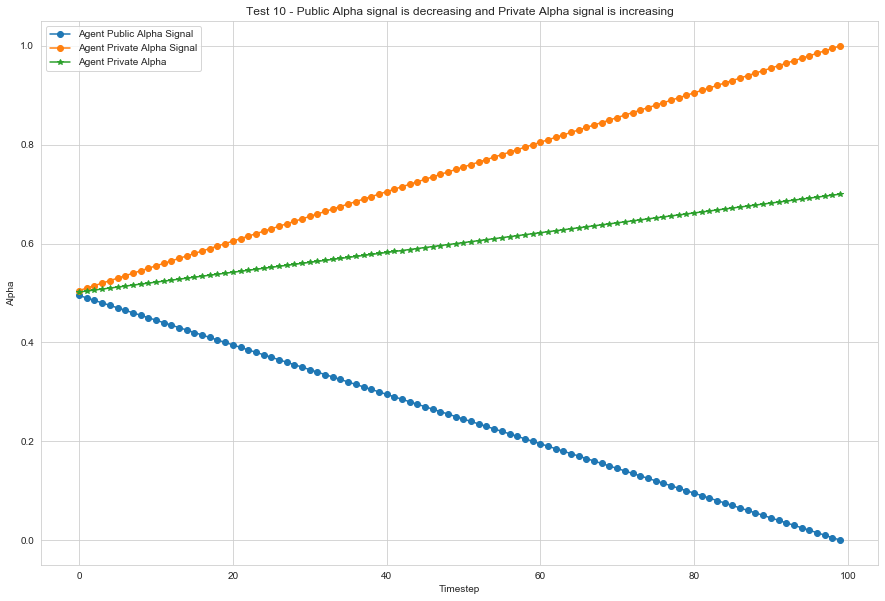

In [2]:
plot_title = 'Test 10 - Public Alpha signal is decreasing and Private Alpha signal is increasing'

alpha_plot(experiments,plot_title);

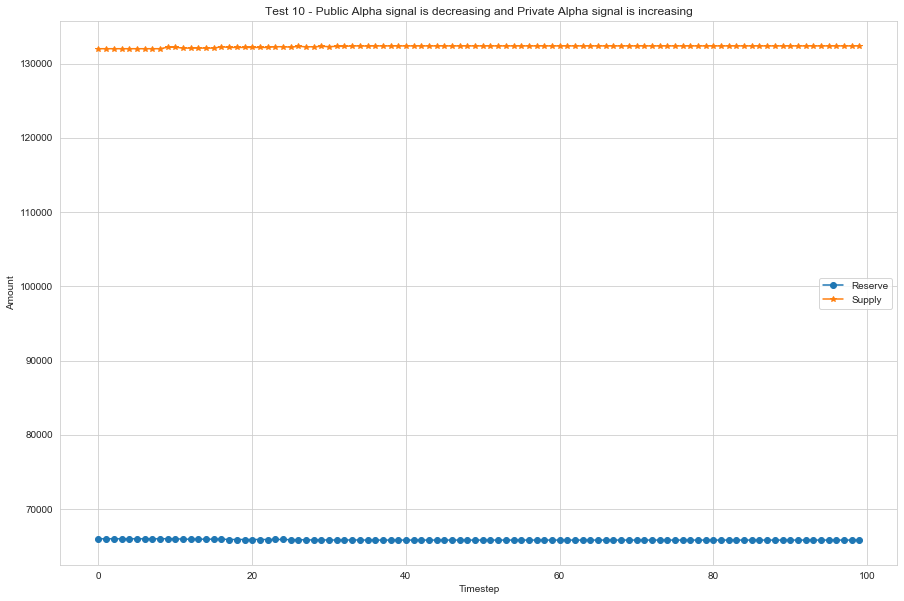

In [3]:
reserve_supply(experiments,plot_title);

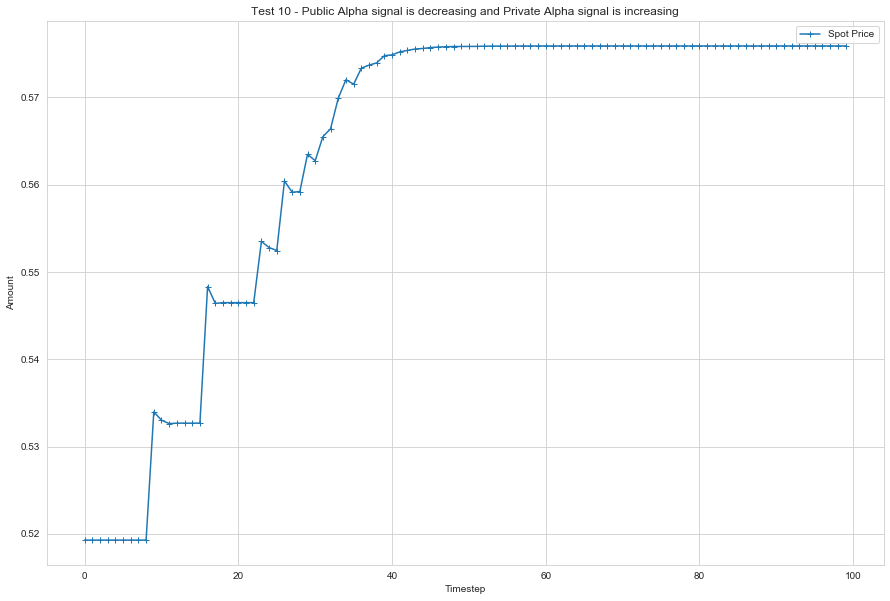

In [4]:
price(experiments,plot_title);

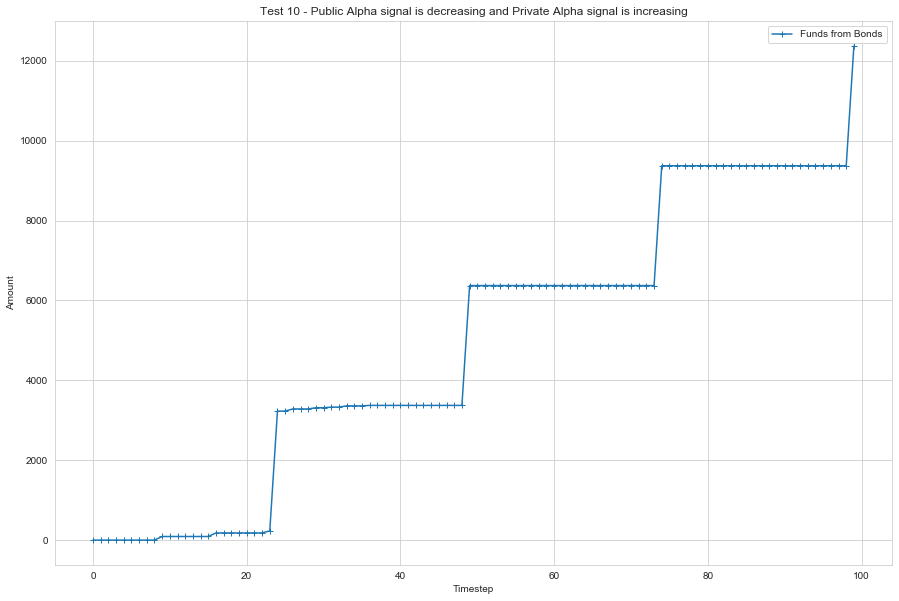

In [5]:
funds_from_bond(experiments,plot_title);

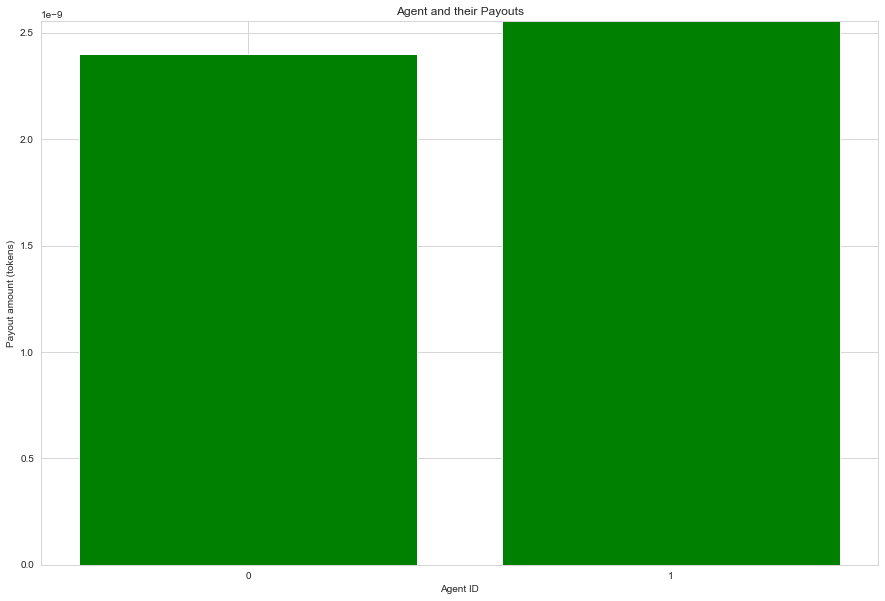

In [6]:
agent_payout_2(experiments);

The simulation results match the test case

### Test 11: Public Alpha signal is increasing and Private Alpha signal is decreasing

Public Alpha signal is set to be controlled and increasing. $$\tilde\alpha_{signal} = 0.5 + \frac{t}{t_{total}}$$ <br>
Private Alpha signal is set to be controlled and decreasing $$\hat\alpha_{signal} = 0.5 - \frac{t}{t_{total}}$$ <br>
The agent has a bias towards their Private Alpha signal, thus $$b = 0.3$$




Update the *update_agent_beliefs* mechanism in the [private_beliefs.py](src/sim/model/parts/private_beliefs.py) file to match what is shown below and update line 53 of [state_variables.py](src/sim/model/state_variables.py) to be 0.5.

```
def update_agent_beliefs(params, substep, state_history, prev_state, policy_input):

    agent = prev_state['chosen_agent']
    timestep = prev_state['timestep']
    params = params[0]
    alpha_bias = params['alpha_bias']
    price_bias = params['price_bias']

    
    b_alpha = 0.3 # weight

    public_alpha_signal = 0.5 + alpha_bias*((1/200)*timestep)
    private_alpha_signal = 0.5 - alpha_bias*((1/200)*timestep)

    new_private_alpha = (b_alpha)*public_alpha_signal + (1-b_alpha)*private_alpha_signal
    
    #new_private_alpha = private_alpha_signal

    b_price = 0.3 # weight

    public_price_signal = 0.5 + price_bias*((1/200)*timestep)
    private_price_signal = 0.5 -  price_bias*((1/200)*timestep)

    new_private_price = (b_price)*public_price_signal + (1-b_price)*private_price_signal


    agent['agent_private_price'] = new_private_price
    agent['agent_private_alpha'] = new_private_alpha

    agent['agent_public_price_signal'] = public_price_signal
    agent['agent_public_alpha_signal'] = public_alpha_signal


    return 'chosen_agent', agent
```

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
# import run2

from src.sim import run

from src.sim.model.parts.utils import *

import seaborn as sns

# For analysis
import numpy as np
import pandas as pd

sns.set_style("whitegrid")

experiments = run.run()


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: multi_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (100, 19, 1, 22)
Execution Method: single_proc_exec
Execution Mode: single_threaded
Total execution time: 0.90s


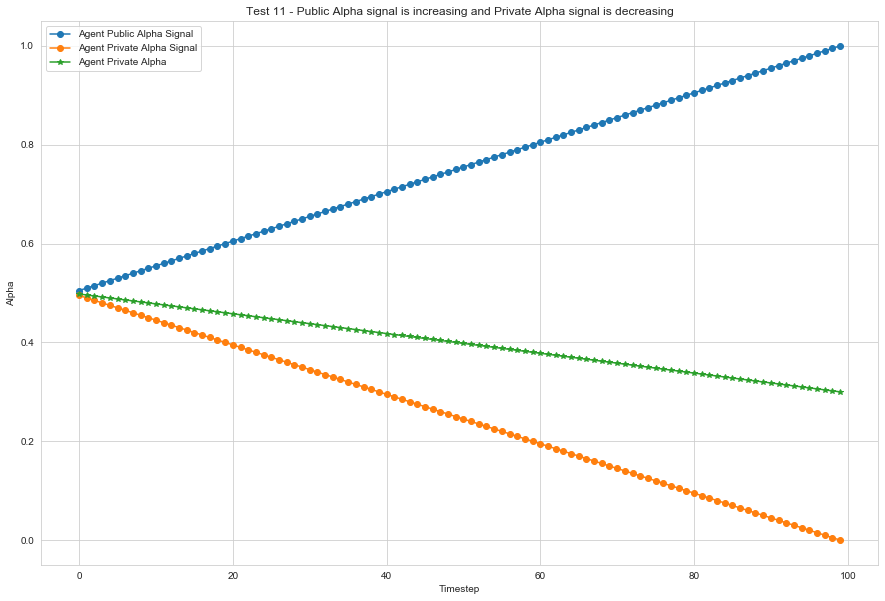

In [3]:
plot_title = 'Test 11 - Public Alpha signal is increasing and Private Alpha signal is decreasing'

alpha_plot(experiments,plot_title);

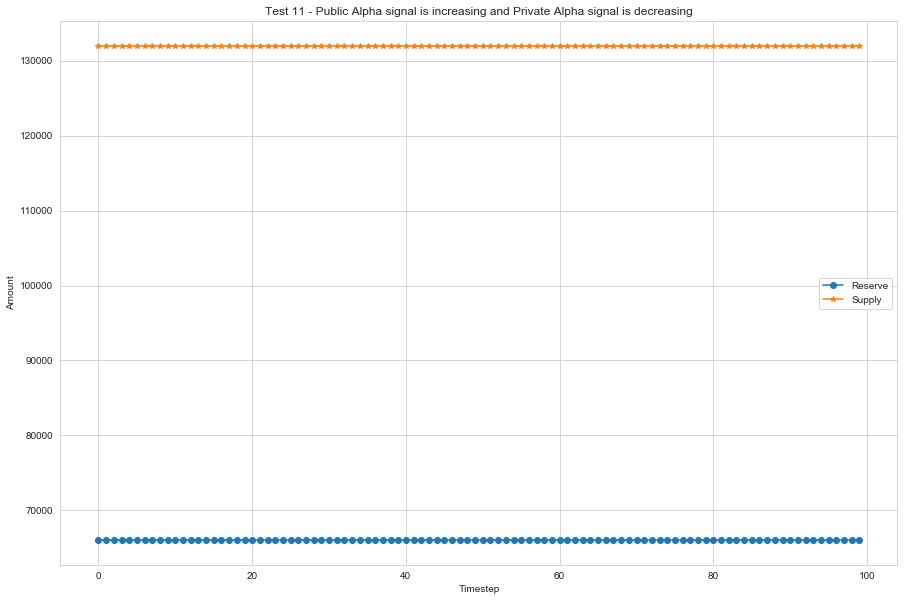

In [4]:
reserve_supply(experiments,plot_title);

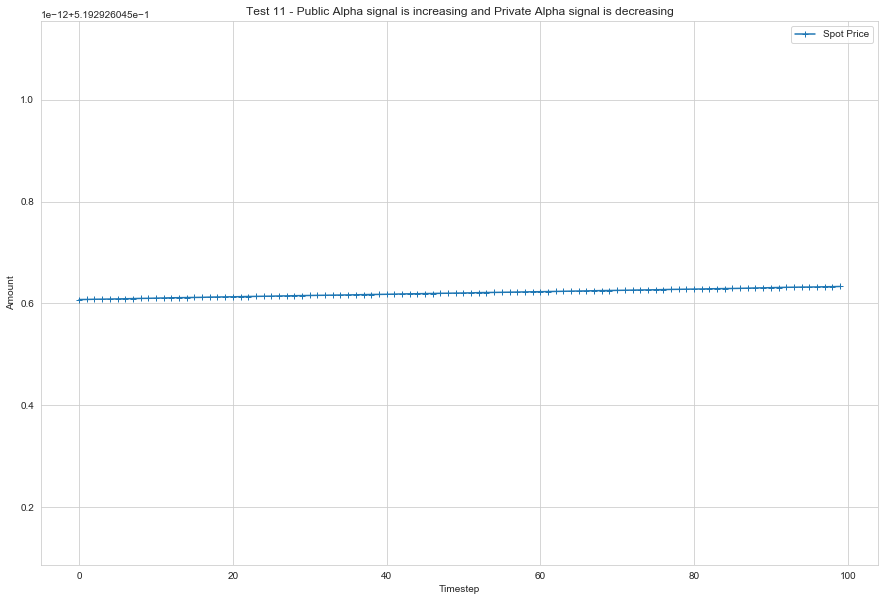

In [5]:
price(experiments,plot_title);

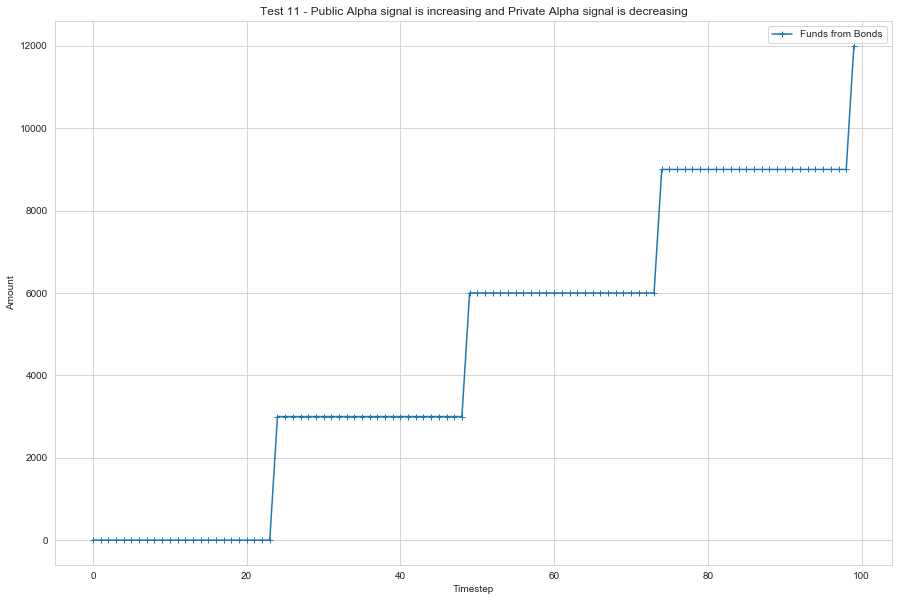

In [6]:
funds_from_bond(experiments,plot_title);

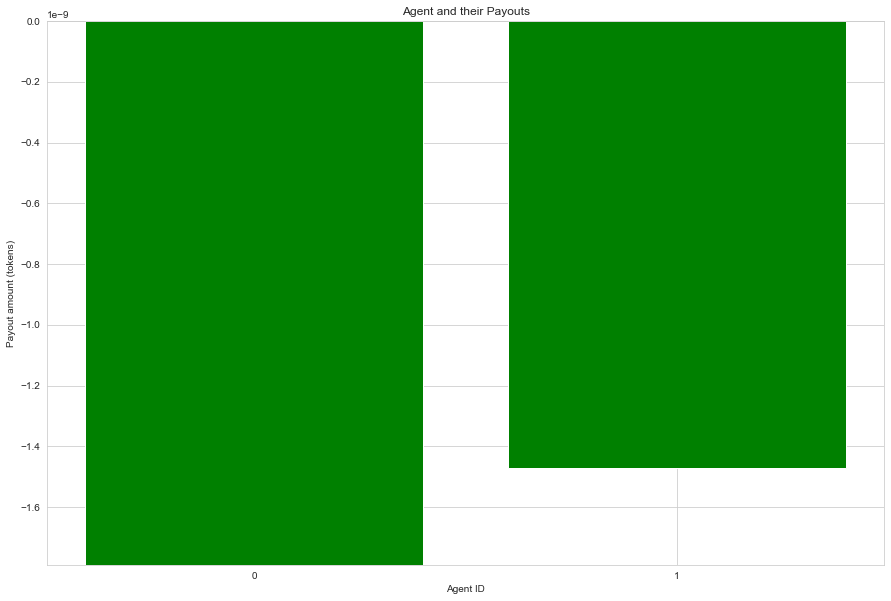

In [7]:
agent_payout_2(experiments);

The simulation results match the test case

### Test 12: Public Alpha signal is decreasing and Private Alpha signal is decreasing

Public Alpha signal is set to be controlled and decreasing. $$\tilde\alpha_{signal} = 0.5 - \frac{t}{t_{total}}$$ <br>
Private Alpha signal is set to be controlled and decreasing $$\hat\alpha_{signal} = 0.5 - \frac{t}{t_{total}}$$ <br>
The agent has a bias towards their Private Alpha signal, thus $$b = 0.3$$




Update the *update_agent_beliefs* mechanism in the [private_beliefs.py](src/sim/model/parts/private_beliefs.py) file to match what is shown below and update line 53 of [state_variables.py](src/sim/model/state_variables.py) to be 0.5.

```
def update_agent_beliefs(params, substep, state_history, prev_state, policy_input):

    agent = prev_state['chosen_agent']
    timestep = prev_state['timestep']
    params = params[0]
    alpha_bias = params['alpha_bias']
    price_bias = params['price_bias']

    
    b_alpha = 0.3 # weight

    public_alpha_signal = 0.5 - alpha_bias*((1/200)*timestep)
    private_alpha_signal = 0.5 - alpha_bias*((1/200)*timestep)

    new_private_alpha = (b_alpha)*public_alpha_signal + (1-b_alpha)*private_alpha_signal
    
    #new_private_alpha = private_alpha_signal

    b_price = 0.3 # weight

    public_price_signal = 0.5 - price_bias*((1/200)*timestep)
    private_price_signal = 0.5 -  price_bias*((1/200)*timestep)

    new_private_price = (b_price)*public_price_signal + (1-b_price)*private_price_signal


    agent['agent_private_price'] = new_private_price
    agent['agent_private_alpha'] = new_private_alpha

    agent['agent_public_price_signal'] = public_price_signal
    agent['agent_public_alpha_signal'] = public_alpha_signal


    return 'chosen_agent', agent
```

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
# import run2

from src.sim import run

from src.sim.model.parts.utils import *

import seaborn as sns

# For analysis
import numpy as np
import pandas as pd

sns.set_style("whitegrid")

experiments = run.run()


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: multi_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (100, 19, 1, 22)
Execution Method: single_proc_exec
Execution Mode: single_threaded
Total execution time: 0.91s


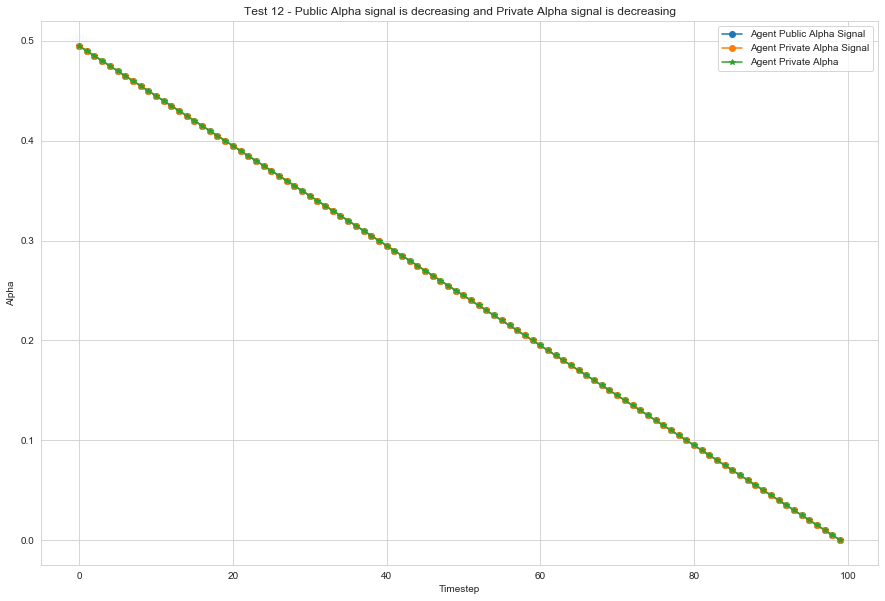

In [2]:
plot_title = 'Test 12 - Public Alpha signal is decreasing and Private Alpha signal is decreasing'

alpha_plot(experiments,plot_title);

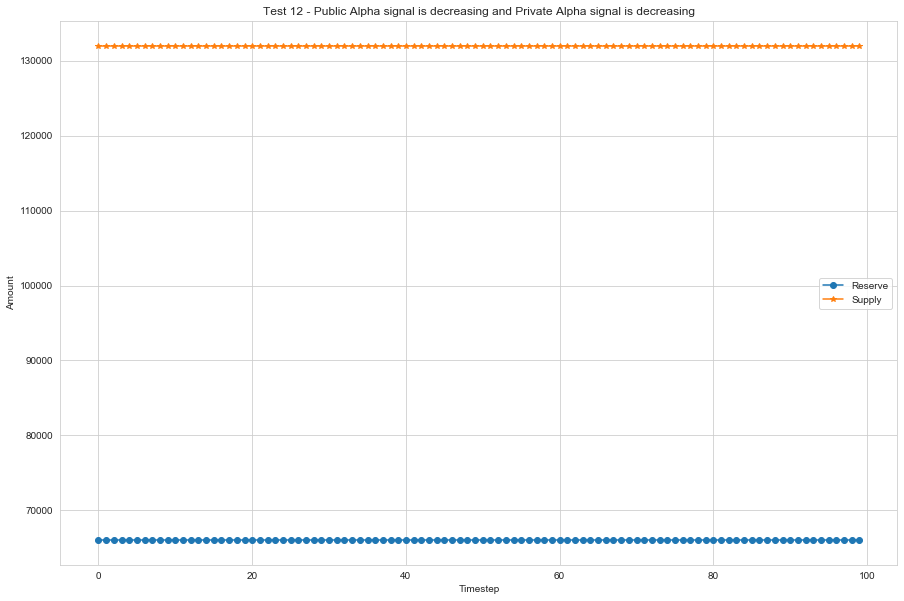

In [4]:
reserve_supply(experiments,plot_title);

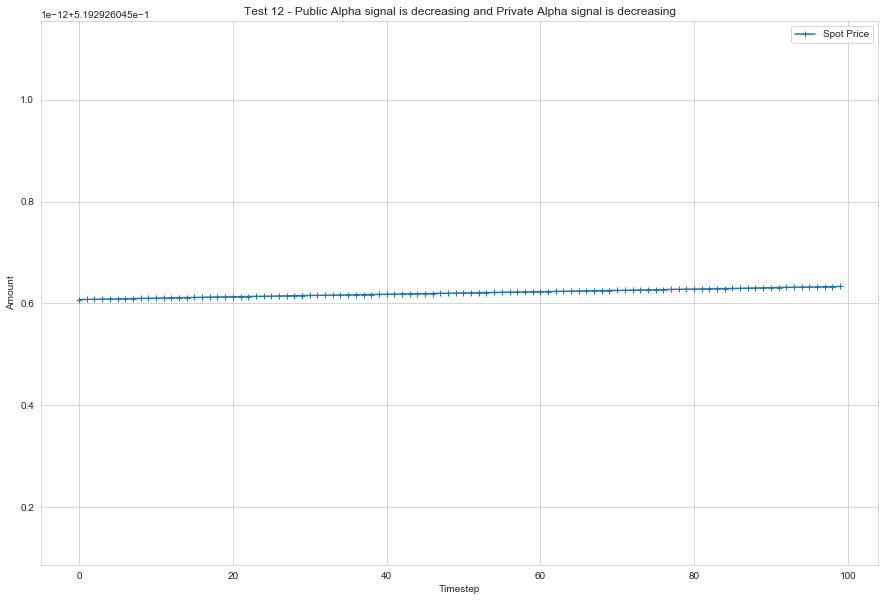

In [5]:
price(experiments,plot_title);

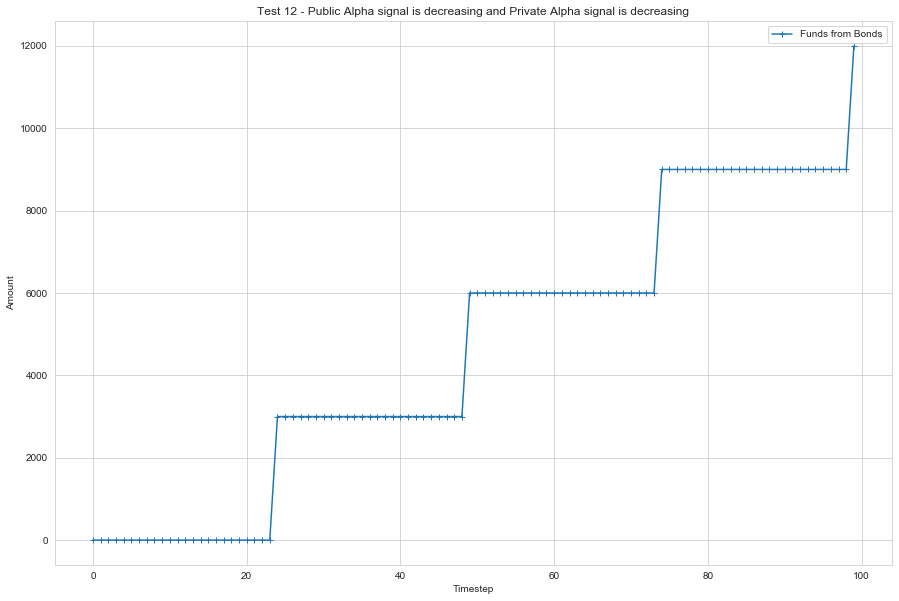

In [6]:
funds_from_bond(experiments,plot_title);

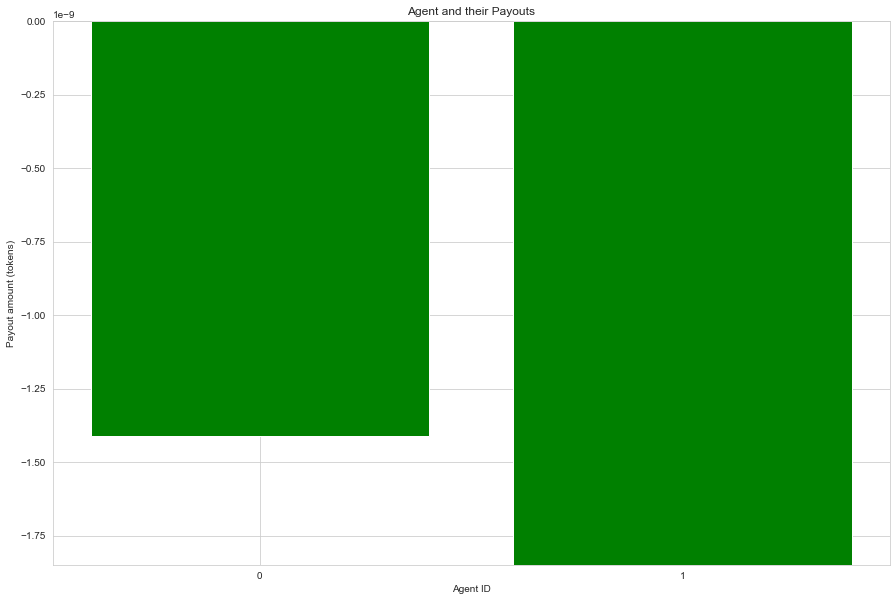

In [7]:
agent_payout_2(experiments);

The simulation results match the test case